In [1]:
!pip install xarray matplotlib cartopy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import xarray as xr
import pandas as pd

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
# Jika nama variabel berbeda, silakan sesuaikan
sst = ds['sst']

# Mengubah dimensi waktu menjadi format datetime
time = pd.to_datetime(sst['time'].values)

# Mengubah data SST menjadi DataFrame dengan meratakan dimensi
# Kita akan menggunakan .to_dataframe() untuk mengonversi menjadi DataFrame
sst_df = sst.to_dataframe().reset_index()

# Menghapus NaN dari DataFrame jika diperlukan
sst_df.dropna(subset=['sst'], inplace=True)

# Menggunakan resampling untuk mendapatkan data bulanan
# Kita perlu mengatur index menjadi datetime
sst_df.set_index('time', inplace=True)

# Menggunakan resampling untuk menghitung rata-rata bulanan
sst_monthly = sst_df.resample('M').mean()

# Menginterpolasi data yang hilang
sst_interpolated = sst_monthly.interpolate(method='time')

# Menampilkan hasil
print(sst_interpolated)

# Jika ingin menyimpan hasil interpolasi ke file CSV
sst_interpolated.to_csv('sst_interpolated.csv')

C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\331009395.py:27: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sst_monthly = sst_df.resample('M').mean()


                 lat         lon        sst
time                                       
1983-01-31 -2.484372  116.849159  28.555592
1983-02-28 -2.484372  116.849159  28.591988
1983-03-31 -2.484372  116.849159  28.916744
1983-04-30 -2.484372  116.849159  29.142370
1983-05-31 -2.484372  116.849159  28.882252
...              ...         ...        ...
2023-08-31 -2.484372  116.849159  28.227531
2023-09-30 -2.484372  116.849159  28.146793
2023-10-31 -2.484372  116.849159  28.678656
2023-11-30 -2.484372  116.849159  29.284298
2023-12-31 -2.484372  116.849159  29.263859

[492 rows x 3 columns]


C:\Users\Syafrizal Hidayat\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


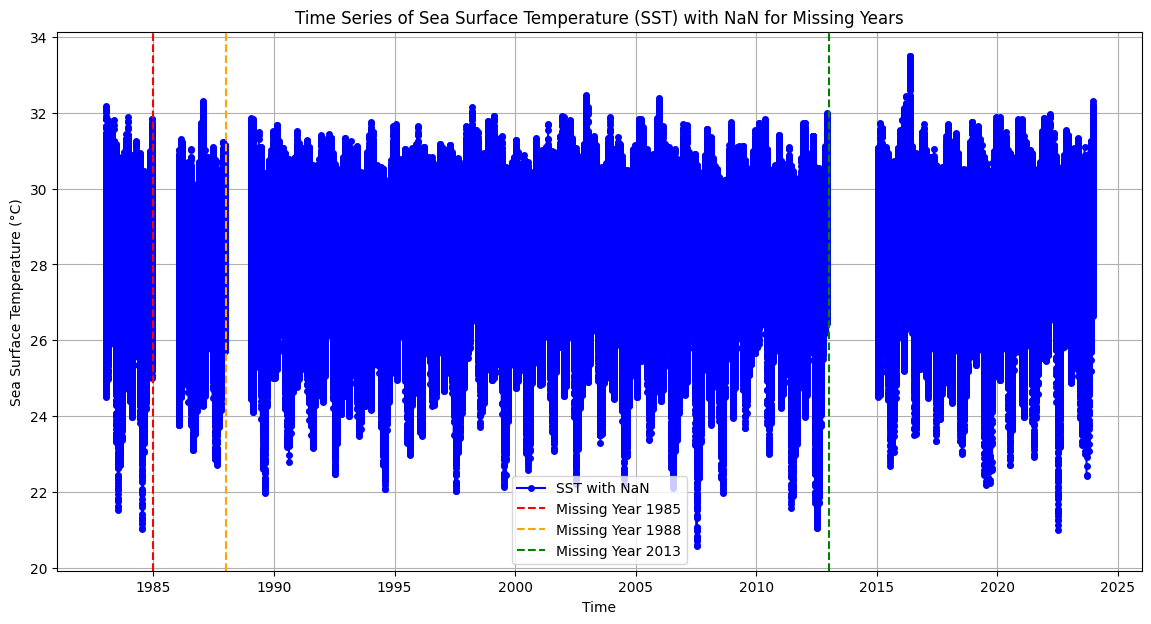

In [7]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
# Jika nama variabel berbeda, silakan sesuaikan
sst = ds['sst']

# Mengubah dimensi waktu menjadi format datetime
time = pd.to_datetime(sst['time'].values)

# Mengubah data SST menjadi DataFrame dengan meratakan dimensi
sst_df = sst.to_dataframe().reset_index()

# Mengatur index menjadi datetime
sst_df.set_index('time', inplace=True)

# Mengubah nilai SST yang kosong menjadi NaN
# Misalkan kita ingin mengatur tahun 1985, 1988, dan 2013 menjadi NaN
years_to_nan = [1985, 1988, 2013]
for year in years_to_nan:
    sst_df.loc[sst_df.index.year == year, 'sst'] = np.nan

# Membuat grafik time series
plt.figure(figsize=(14, 7))
plt.plot(sst_df.index, sst_df['sst'], label='SST with NaN', color='blue', marker='o', markersize=4)
plt.title('Time Series of Sea Surface Temperature (SST) with NaN for Missing Years')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature (°C)')
plt.axvline(x=pd.to_datetime(f'{years_to_nan[0]}-01-01'), color='red', linestyle='--', label='Missing Year 1985')
plt.axvline(x=pd.to_datetime(f'{years_to_nan[1]}-01-01'), color='orange', linestyle='--', label='Missing Year 1988')
plt.axvline(x=pd.to_datetime(f'{years_to_nan[2]}-01-01'), color='green', linestyle='--', label='Missing Year 2013')
plt.legend()
plt.grid()
plt.show()

# Jika ingin menyimpan hasil ke file CSV
sst_df.to_csv('sst_with_nan.csv')

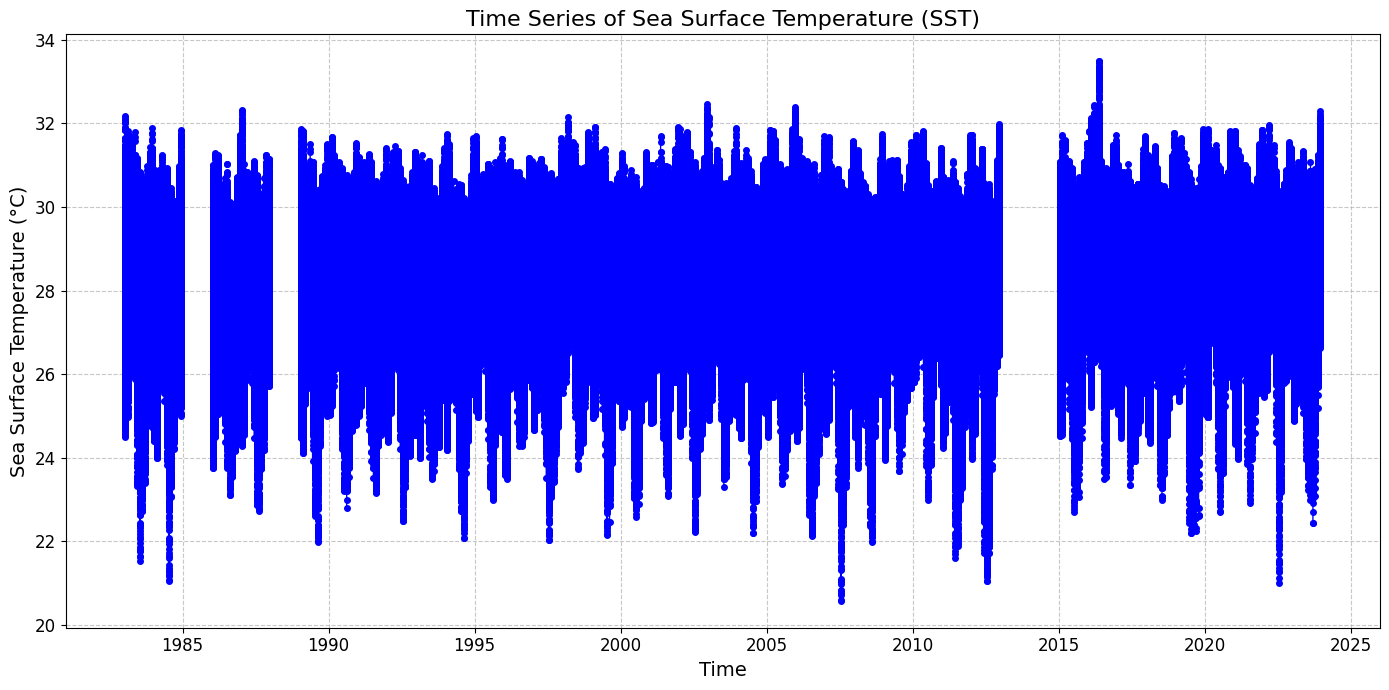

In [8]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
# Jika nama variabel berbeda, silakan sesuaikan
sst = ds['sst']

# Mengubah dimensi waktu menjadi format datetime
time = pd.to_datetime(sst['time'].values)

# Mengubah data SST menjadi DataFrame dengan meratakan dimensi
sst_df = sst.to_dataframe().reset_index()

# Mengatur index menjadi datetime
sst_df.set_index('time', inplace=True)

# Mengubah nilai SST yang kosong menjadi NaN
# Misalkan kita ingin mengatur tahun 1985, 1988, dan 2013 menjadi NaN
years_to_nan = [1985, 1988, 2013]
for year in years_to_nan:
    sst_df.loc[sst_df.index.year == year, 'sst'] = np.nan

# Membuat grafik time series
plt.figure(figsize=(14, 7))
plt.plot(sst_df.index, sst_df['sst'], color='blue', marker='o', markersize=4, linewidth=1)
plt.title('Time Series of Sea Surface Temperature (SST)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Untuk merapikan layout grafik
plt.show()

# Jika ingin menyimpan hasil ke file CSV
sst_df.to_csv('sst_with_nan.csv')

C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\1944839614.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\1944839614.py:46: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')],


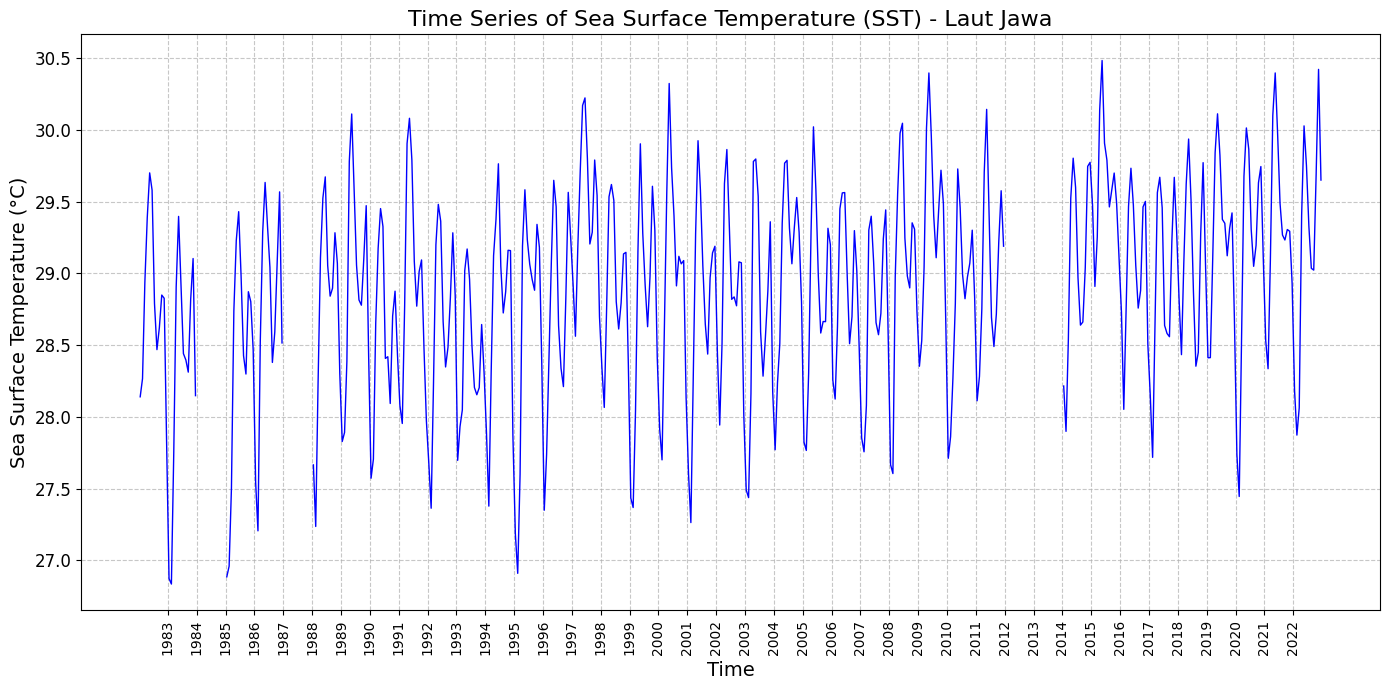

In [16]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
sst = ds['sst']

# Menentukan batas geografis Laut Jawa (misalkan)
lat_min, lat_max = -7.0, 5.0  # Batas latitude Laut Jawa
lon_min, lon_max = 105.0, 115.0  # Batas longitude Laut Jawa

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Menghitung rata-rata SST untuk Laut Jawa
sst_jawa_mean = sst_jawa.mean(dim=['lat', 'lon'])

# Mengubah dimensi waktu menjadi format datetime
time = pd.to_datetime(sst_jawa_mean['time'].values)

# Mengubah data SST menjadi DataFrame
sst_jawa_df = sst_jawa_mean.to_dataframe().reset_index()

# Mengatur index menjadi datetime
sst_jawa_df.set_index('time', inplace=True)

# Mengubah nilai SST yang kosong menjadi NaN
years_to_nan = [1985, 1988, 2013]
for year in years_to_nan:
    sst_jawa_df.loc[sst_jawa_df.index.year == year, 'sst'] = np.nan

# Membuat grafik time series untuk Laut Jawa
plt.figure(figsize=(14, 7))
plt.plot(sst_jawa_df.index, sst_jawa_df['sst'], color='blue', linewidth=1)  # Hanya garis
plt.title('Time Series of Sea Surface Temperature (SST) - Laut Jawa', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=14)

# Mengatur tampilan tahun di sumbu x
plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(), 
           labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')], 
           rotation=90, fontsize=10)  # Menampilkan semua tahun dengan rotasi 90 derajat

plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Untuk merapikan layout grafik
plt.show()



C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:38: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sst_jawa_monthly = sst_jawa_df.resample('M').mean()  # Frekuensi bulanan
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:41: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  sst_jawa_annual = sst_jawa_df.resample('A').mean()  # Frekuensi tahunan
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:49: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:50: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  labels=[str(year.ye

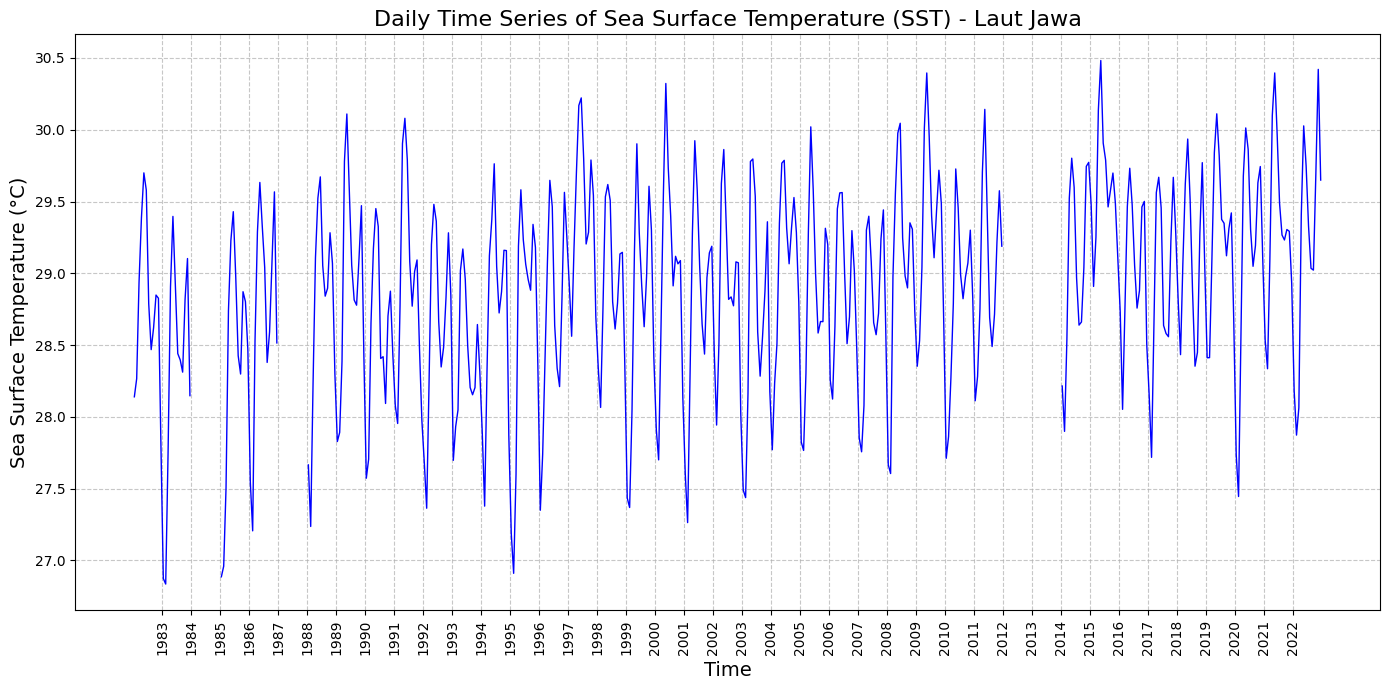

C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:62: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:63: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')],


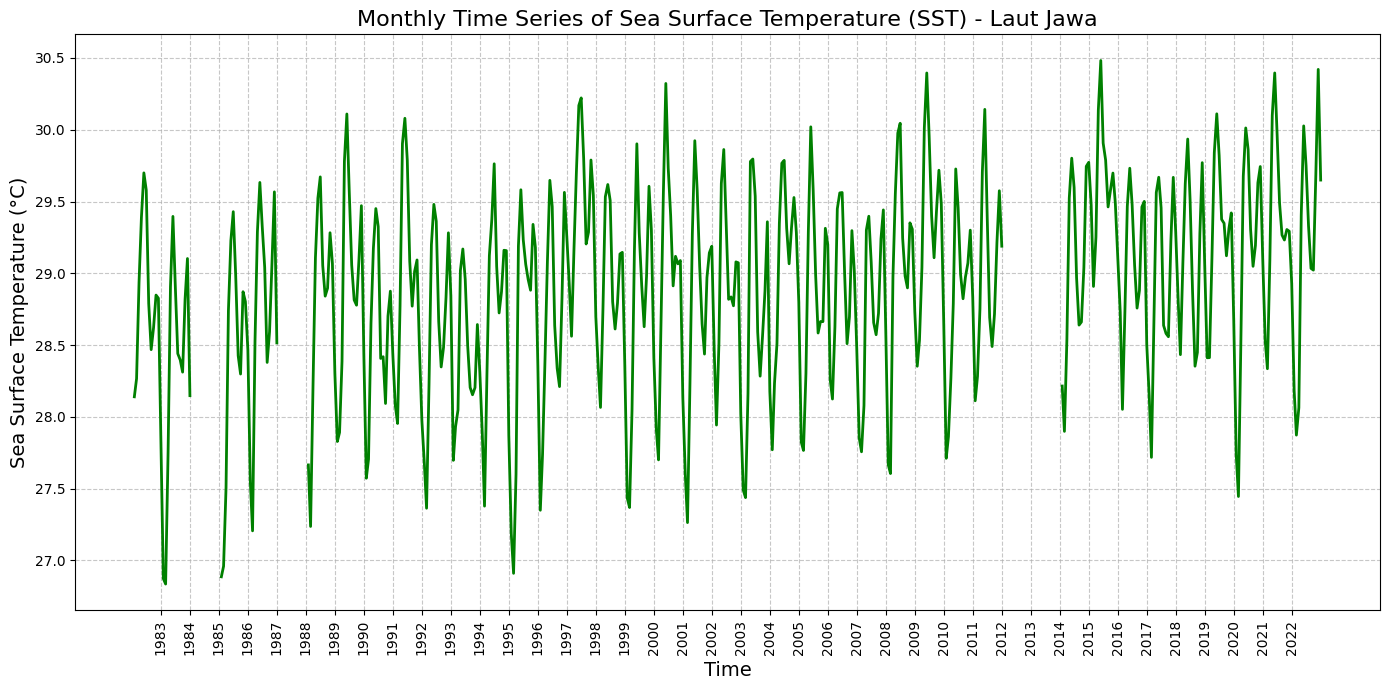

C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:75: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\2792266785.py:76: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')],


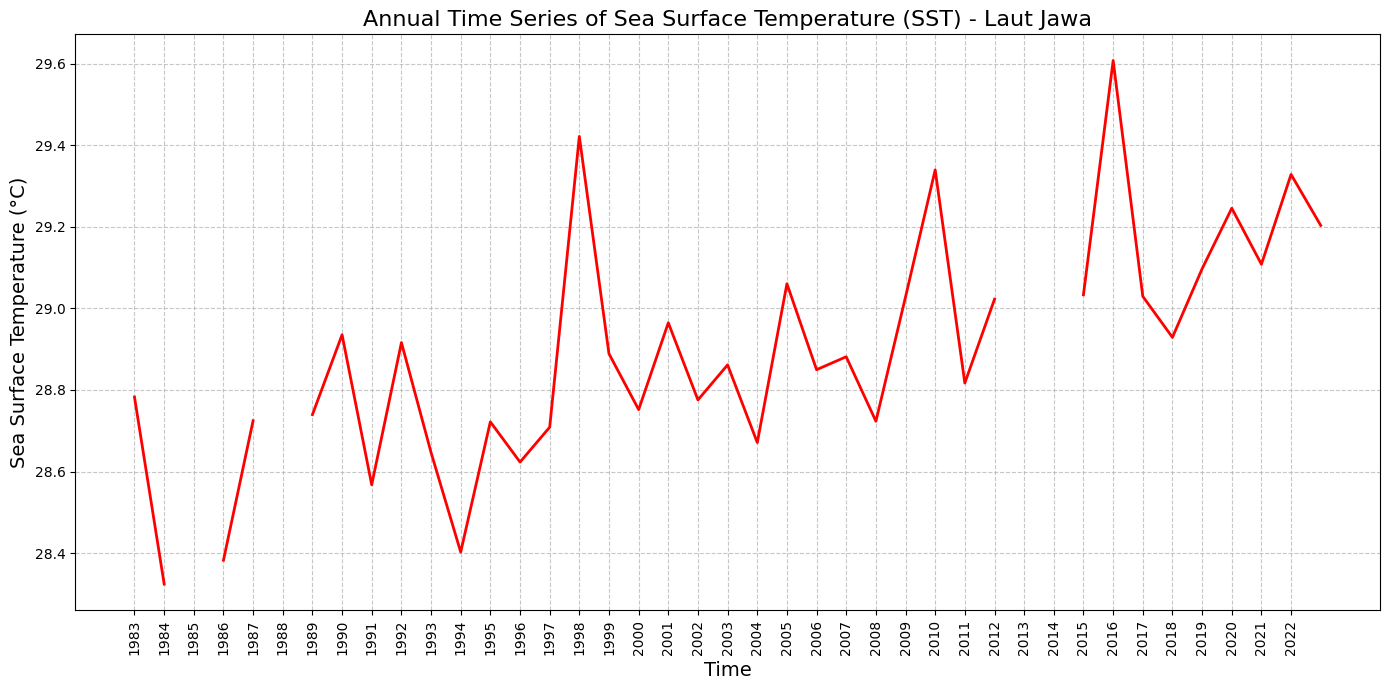

In [18]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
sst = ds['sst']

# Menentukan batas geografis Laut Jawa (misalkan)
lat_min, lat_max = -7.0, 5.0  # Batas latitude Laut Jawa
lon_min, lon_max = 105.0, 115.0  # Batas longitude Laut Jawa

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Menghitung rata-rata SST untuk Laut Jawa
sst_jawa_mean = sst_jawa.mean(dim=['lat', 'lon'])

# Mengubah dimensi waktu menjadi format datetime
time = pd.to_datetime(sst_jawa_mean['time'].values)

# Mengubah data SST menjadi DataFrame
sst_jawa_df = sst_jawa_mean.to_dataframe().reset_index()

# Mengatur index menjadi datetime
sst_jawa_df.set_index('time', inplace=True)

# Mengubah nilai SST yang kosong menjadi NaN
years_to_nan = [1985, 1988, 2013]
for year in years_to_nan:
    sst_jawa_df.loc[sst_jawa_df.index.year == year, 'sst'] = np.nan

# Resampling untuk time series bulanan
sst_jawa_monthly = sst_jawa_df.resample('M').mean()  # Frekuensi bulanan

# Resampling untuk time series tahunan
sst_jawa_annual = sst_jawa_df.resample('A').mean()  # Frekuensi tahunan

# Grafik Time Series Harian
plt.figure(figsize=(14, 7))
plt.plot(sst_jawa_df.index, sst_jawa_df['sst'], color='blue', linewidth=1)
plt.title('Daily Time Series of Sea Surface Temperature (SST) - Laut Jawa', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=14)
plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
           labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')],
           rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Grafik Time Series Bulanan
plt.figure(figsize=(14, 7))
plt.plot(sst_jawa_monthly.index, sst_jawa_monthly['sst'], color='green', linewidth=2)
plt.title('Monthly Time Series of Sea Surface Temperature (SST) - Laut Jawa', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=14)
plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
           labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')],
           rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Grafik Time Series Tahunan
plt.figure(figsize=(14, 7))
plt.plot(sst_jawa_annual.index, sst_jawa_annual['sst'], color='red', linewidth=2)
plt.title('Annual Time Series of Sea Surface Temperature (SST) - Laut Jawa', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Surface Temperature (°C)', fontsize=14)
plt.xticks(pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y').to_pydatetime(),
           labels=[str(year.year) for year in pd.date_range(start=sst_jawa_df.index.min(), end=sst_jawa_df.index.max(), freq='Y')],
           rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Jika ingin menyimpan hasil ke file CSV
sst_jawa_df.to_csv('sst_jawa_with_nan.csv')
sst_jawa_monthly.to_csv('sst_jawa_monthly.csv')
sst_jawa_annual.to_csv('sst_jawa_annual.csv')


C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\3327602624.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sst_jawa_monthly = sst_jawa_df.resample('M').mean()  # Frekuensi bulanan
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\3327602624.py:64: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.xticks(pd.date_range(start=decade_data.index.min(), end=decade_data.index.max(), freq='Y').to_pydatetime(),
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\3327602624.py:65: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  labels=[str(year.year) for year in pd.date_range(start=decade_data.index.min(), end=decade_data.index.max(), freq='Y')],


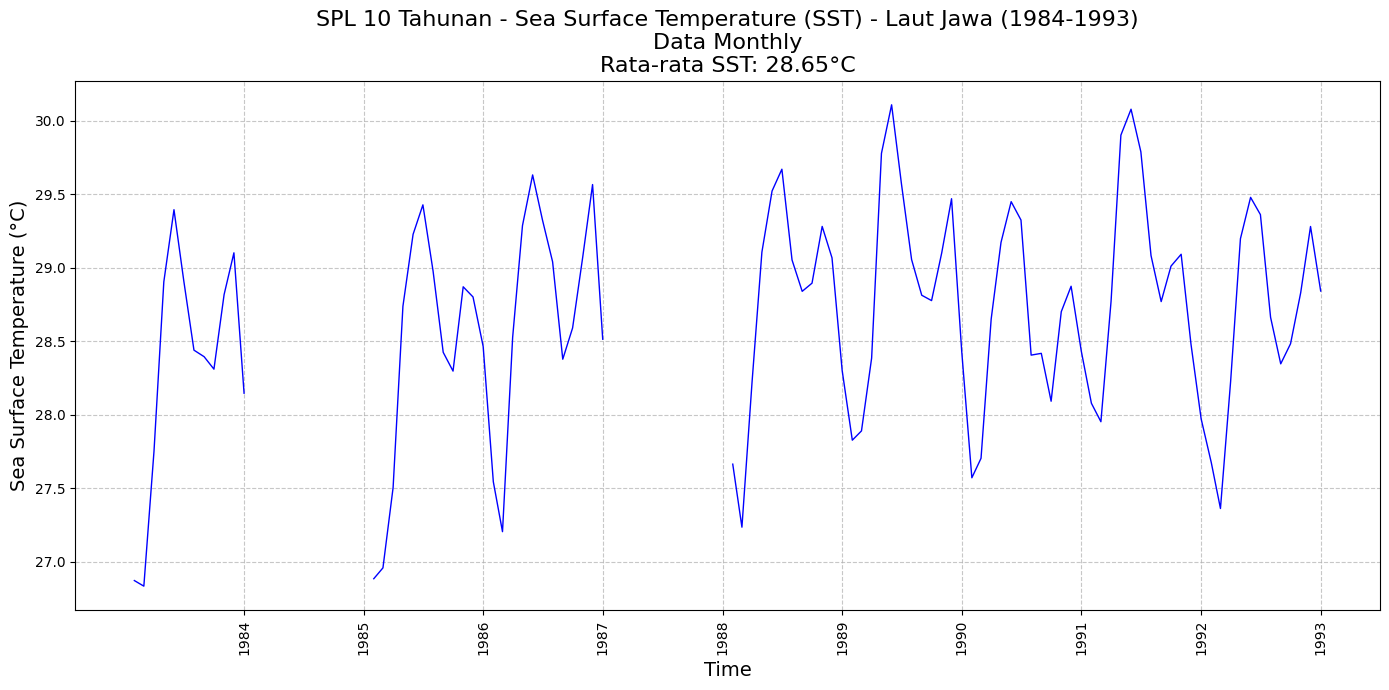

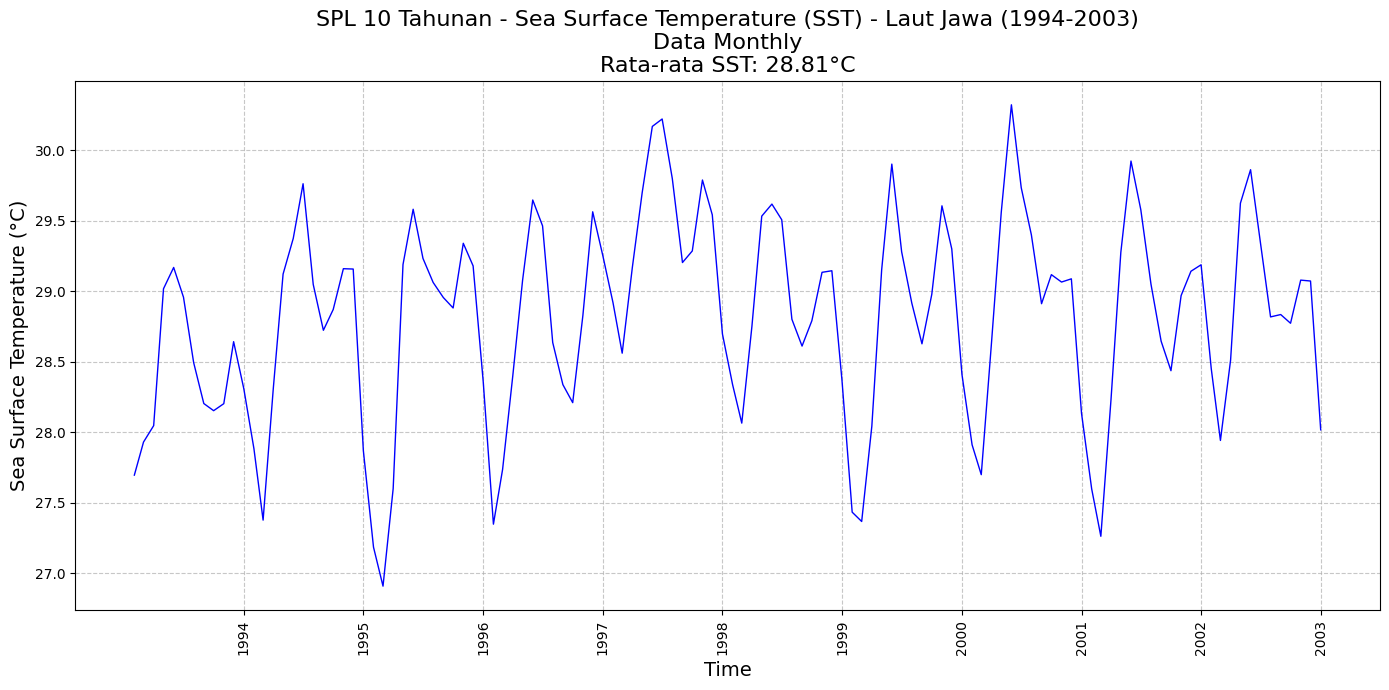

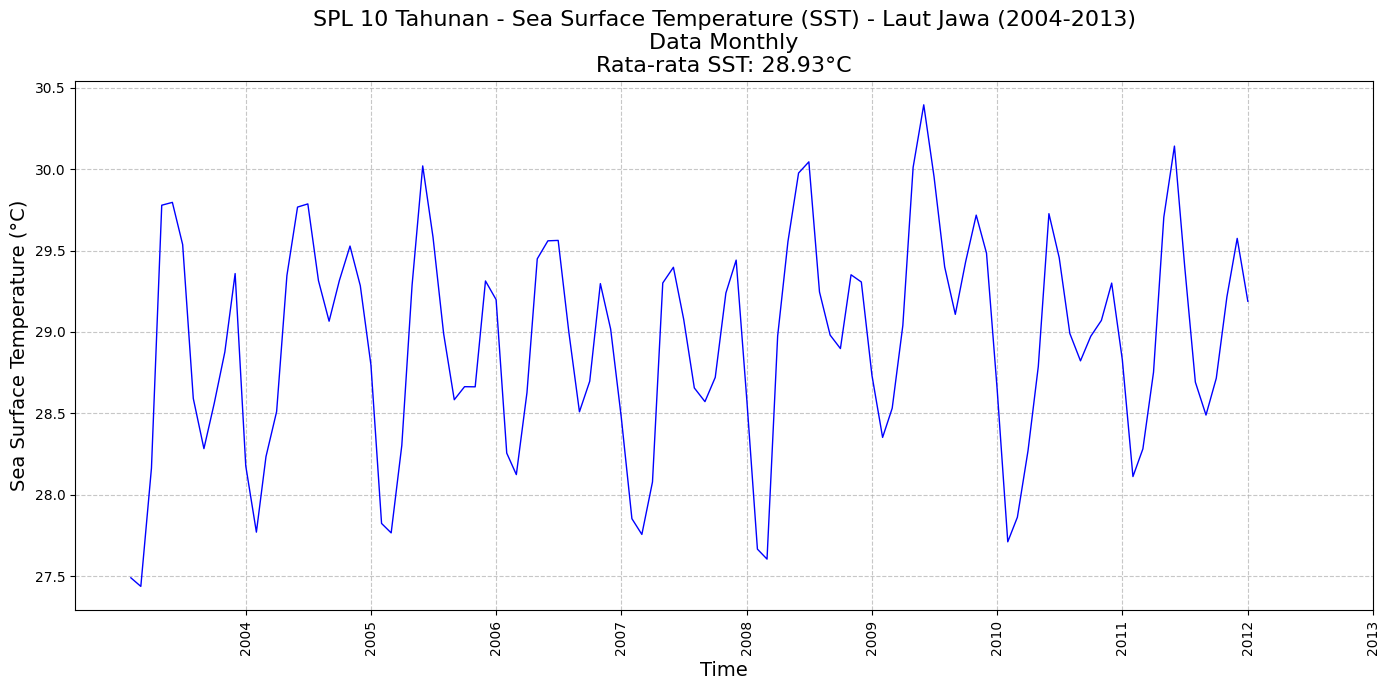

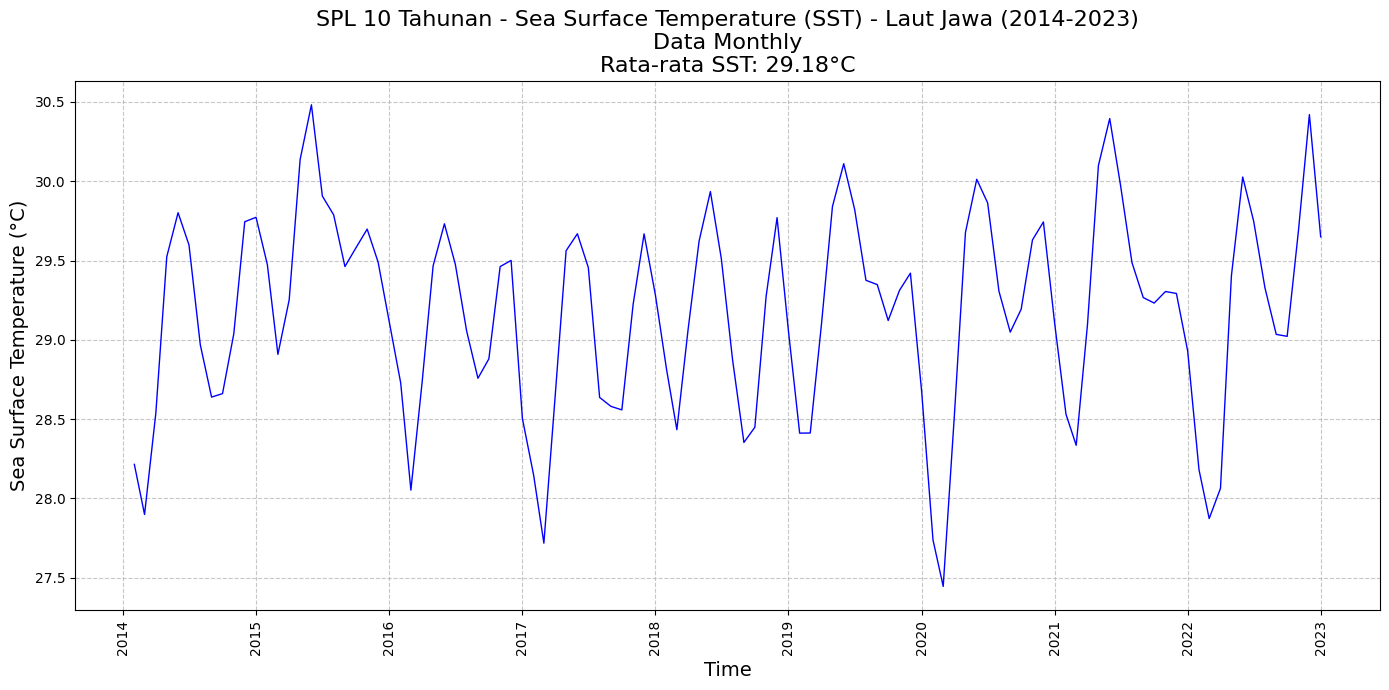

In [21]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
sst = ds['sst']

# Menentukan batas geografis Laut Jawa (misalkan)
lat_min, lat_max = -7.0, 5.0  # Batas latitude Laut Jawa
lon_min, lon_max = 105.0, 115.0  # Batas longitude Laut Jawa

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Menghitung rata-rata SST untuk Laut Jawa
sst_jawa_mean = sst_jawa.mean(dim=['lat', 'lon'])

# Mengubah dimensi waktu menjadi format datetime
time = pd.to_datetime(sst_jawa_mean['time'].values)

# Mengubah data SST menjadi DataFrame
sst_jawa_df = sst_jawa_mean.to_dataframe().reset_index()

# Mengatur index menjadi datetime
sst_jawa_df.set_index('time', inplace=True)

# Daftar tahun yang memiliki data kosong
years_to_nan = [1985, 1988, 2013]

# Mengubah nilai SST menjadi NaN untuk tahun tertentu
for year in years_to_nan:
    sst_jawa_df.loc[sst_jawa_df.index.year == year, 'sst'] = np.nan

# Resampling untuk data bulanan
sst_jawa_monthly = sst_jawa_df.resample('M').mean()  # Frekuensi bulanan

# Membagi data menjadi 4 dekade sesuai rentang yang diminta
decades = [
    (1984, 1993),
    (1994, 2003),
    (2004, 2013),
    (2014, 2023)
]

# Membuat grafik untuk setiap dekade (SPL 10 Tahunan)
for start, end in decades:
    # Filter data untuk dekade tertentu
    decade_data = sst_jawa_monthly[(sst_jawa_monthly.index.year >= start) & (sst_jawa_monthly.index.year <= end)]
    
    # Menghitung rata-rata SST bulanan untuk dekade ini
    sst_decade_mean = decade_data['sst'].mean()
    
    # Membuat grafik untuk dekade ini
    plt.figure(figsize=(14, 7))
    plt.plot(decade_data.index, decade_data['sst'], color='blue', linewidth=1)
    plt.title(f'SPL 10 Tahunan - Sea Surface Temperature (SST) - Laut Jawa ({start}-{end})\nData Monthly\nRata-rata SST: {sst_decade_mean:.2f}°C', fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Sea Surface Temperature (°C)', fontsize=14)
    plt.xticks(pd.date_range(start=decade_data.index.min(), end=decade_data.index.max(), freq='Y').to_pydatetime(),
               labels=[str(year.year) for year in pd.date_range(start=decade_data.index.min(), end=decade_data.index.max(), freq='Y')],
               rotation=90, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Jika ingin menyimpan hasil ke file CSV
sst_jawa_monthly.to_csv('sst_jawa_monthly.csv')


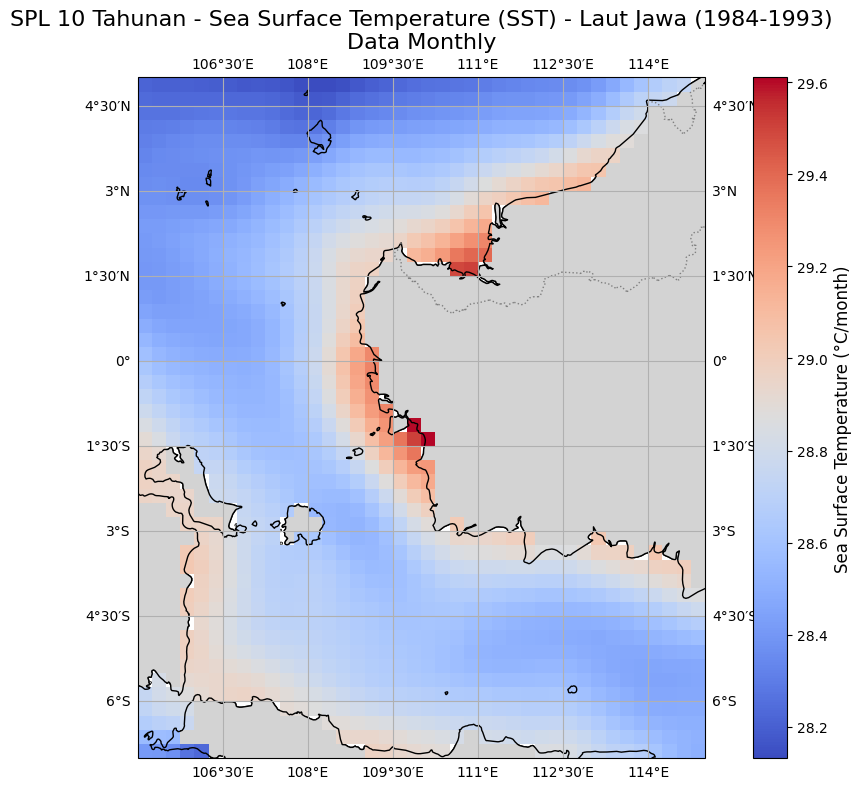

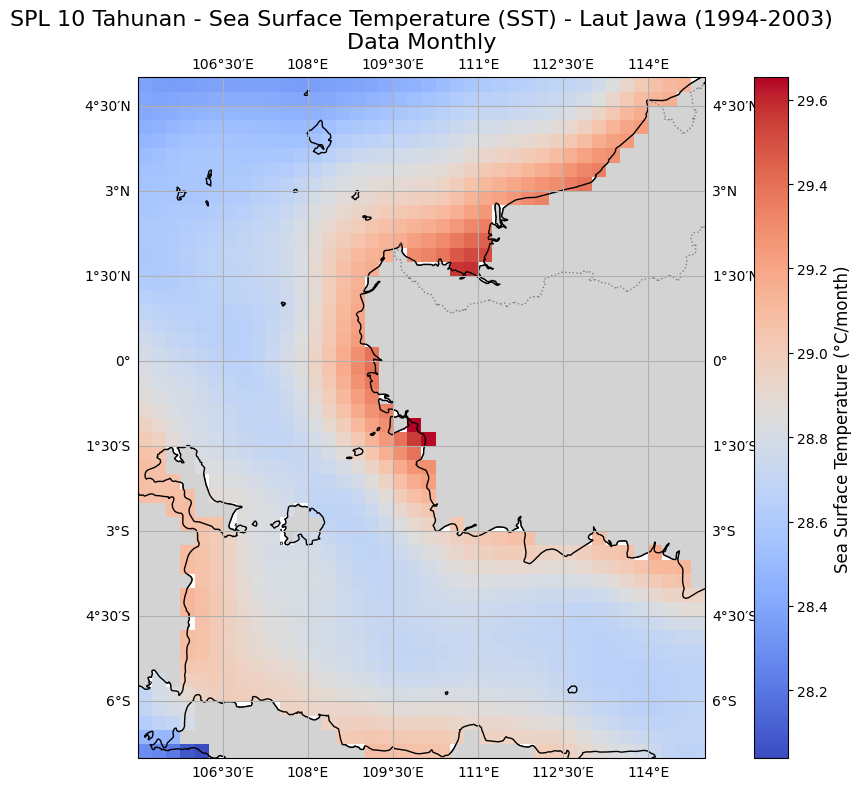

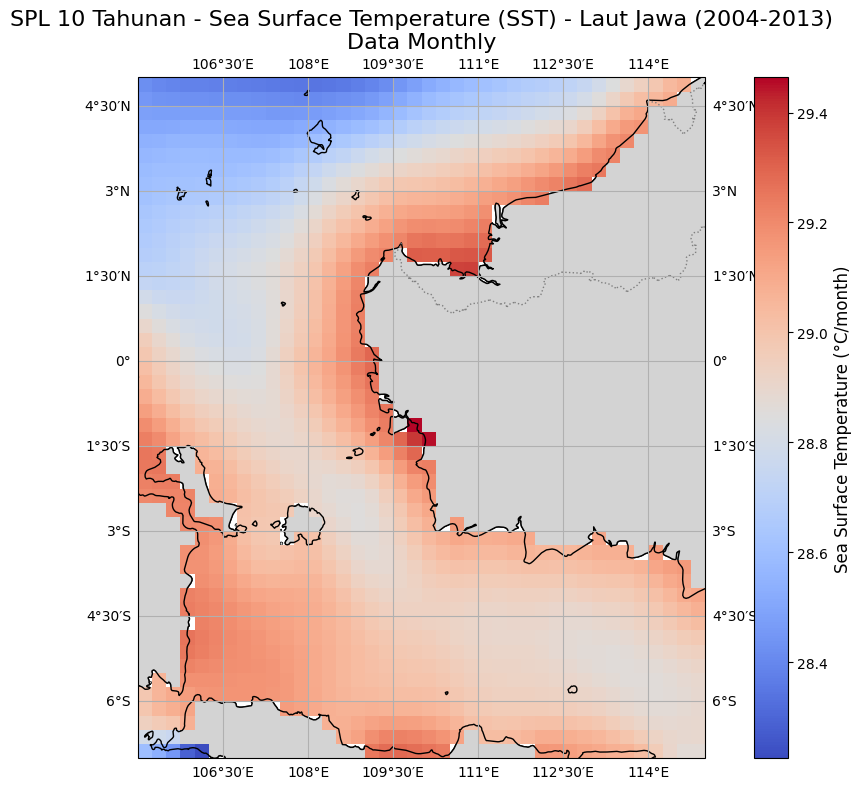

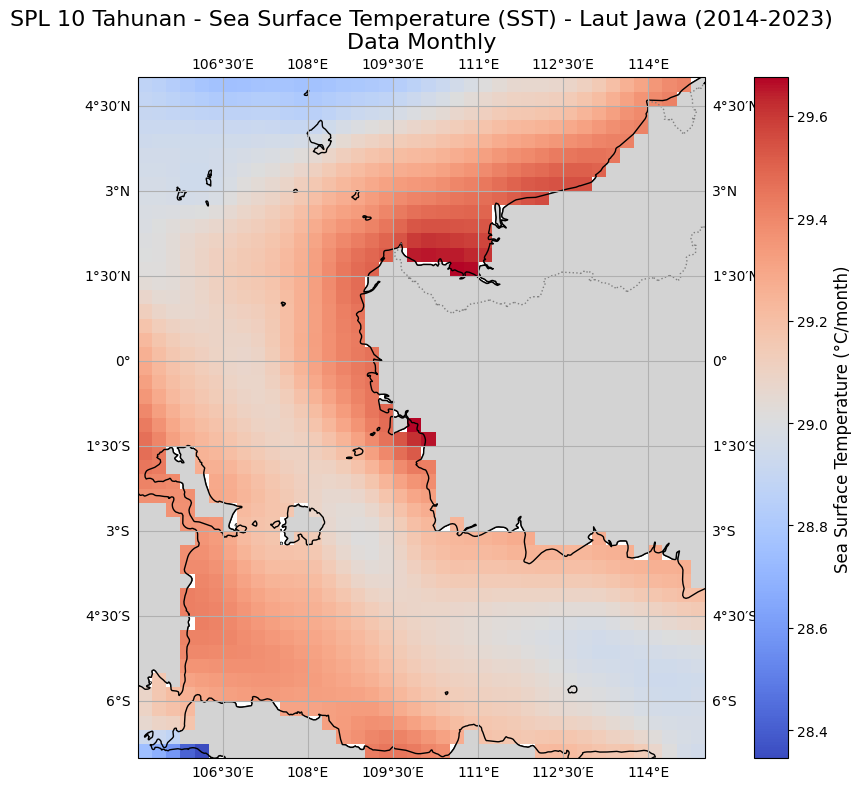

In [26]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0  # Batas latitude Laut Jawa
lon_min, lon_max = 105.0, 115.0  # Batas longitude Laut Jawa

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang akan diubah menjadi NaN untuk mencegah outlier
years_to_exclude = [1985, 1988, 2013]

# Filter untuk hanya memasukkan tahun yang diinginkan dalam setiap dekade
decades = [
    (1984, 1993, [1984, 1986, 1987, 1989, 1990, 1991, 1992, 1993]),
    (1994, 2003, None),  # Semua tahun dimasukkan
    (2004, 2013, [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]),  # Kecuali 2013
    (2014, 2023, None)   # Semua tahun dimasukkan
]

# Membuat grafik untuk setiap dekade (plot spasial)
for start, end, included_years in decades:
    # Filter data untuk dekade tertentu
    decade_data = sst_jawa.sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    
    # Menghapus tahun yang dikecualikan dengan mengubahnya menjadi NaN
    if included_years is not None:
        decade_data = decade_data.where(decade_data['time.year'].isin(included_years), drop=True)

    # Mengambil rata-rata SST sepanjang dekade ini
    sst_decade_mean = decade_data.mean(dim='time')

    # Membuat plot spasial menggunakan Cartopy
    fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Plot peta dunia dan fitur geografis
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')

    # Plot data SST
    mesh = ax.pcolormesh(sst_decade_mean['lon'], sst_decade_mean['lat'], sst_decade_mean,
                         cmap='coolwarm', transform=ccrs.PlateCarree(), shading='auto')
    
    # Menambahkan colorbar
    cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label('Sea Surface Temperature (°C/month)', fontsize=12)

    # Menambahkan judul dengan rentang dekade
    ax.set_title(f'SPL 10 Tahunan - Sea Surface Temperature (SST) - Laut Jawa ({start}-{end})\nData Monthly', fontsize=16)

    # Menambahkan label sumbu X dan Y
    ax.set_xlabel('Longitude (°E)', fontsize=12)
    ax.set_ylabel('Latitude (°N)', fontsize=12)

    # Menambahkan gridlines untuk Latitude dan Longitude
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

    # Menampilkan plot
    plt.tight_layout()
    plt.show()


c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


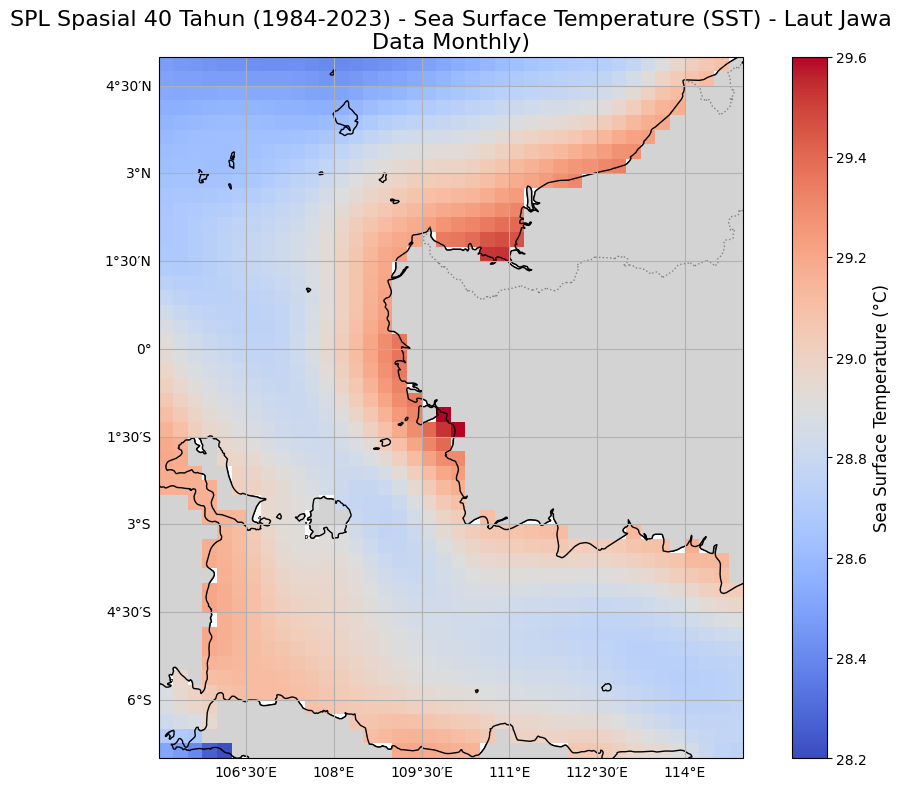

In [104]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0  # Batas latitude Laut Jawa
lon_min, lon_max = 105.0, 115.0  # Batas longitude Laut Jawa

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang akan diubah menjadi NaN untuk mencegah outlier
years_to_nan = [1985, 1988, 2013]

# Mengubah nilai SST menjadi NaN untuk tahun tertentu
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Menghitung rata-rata bulanan SST untuk Laut Jawa
sst_jawa_monthly_mean = sst_jawa.resample(time='M').mean()

# Menghitung rata-rata SST bulanan untuk 40 tahun (menggunakan mean across all months over the 40 years)
sst_40yr_mean = sst_jawa_monthly_mean.mean(dim='time')

# Membuat plot spasial menggunakan Cartopy
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot peta dunia dan fitur geografis
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plot data SST dengan rentang colorbar yang tetap
vmin, vmax = 28.2, 29.6  # Rentang SST yang diinginkan
mesh = ax.pcolormesh(sst_40yr_mean['lon'], sst_40yr_mean['lat'], sst_40yr_mean,
                     cmap='coolwarm', vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree(), shading='auto')

# Menambahkan colorbar dengan rentang yang sama
cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Sea Surface Temperature (°C)', fontsize=12)

# Menambahkan judul
ax.set_title('SPL Spasial 40 Tahun (1984-2023) - Sea Surface Temperature (SST) - Laut Jawa\nData Monthly)', fontsize=16)

# Menambahkan label sumbu X dan Y
ax.set_xlabel('Longitude (°E)', fontsize=12)
ax.set_ylabel('Latitude (°N)', fontsize=12)

# Menambahkan gridlines untuk Latitude dan Longitude
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Menampilkan plot
plt.tight_layout()
plt.show()

# Jika ingin menyimpan hasil ke file CSV
# Menghitung rata-rata bulanan setelah pengecualian dan menyimpannya ke file CSV
sst_jawa_monthly_mean_df = sst_jawa_monthly_mean.mean(dim=['lat', 'lon']).to_dataframe().reset_index()
sst_jawa_monthly_mean_df.set_index('time', inplace=True)
sst_jawa_monthly_mean_df.to_csv('sst_jawa_monthly_40yr.csv')


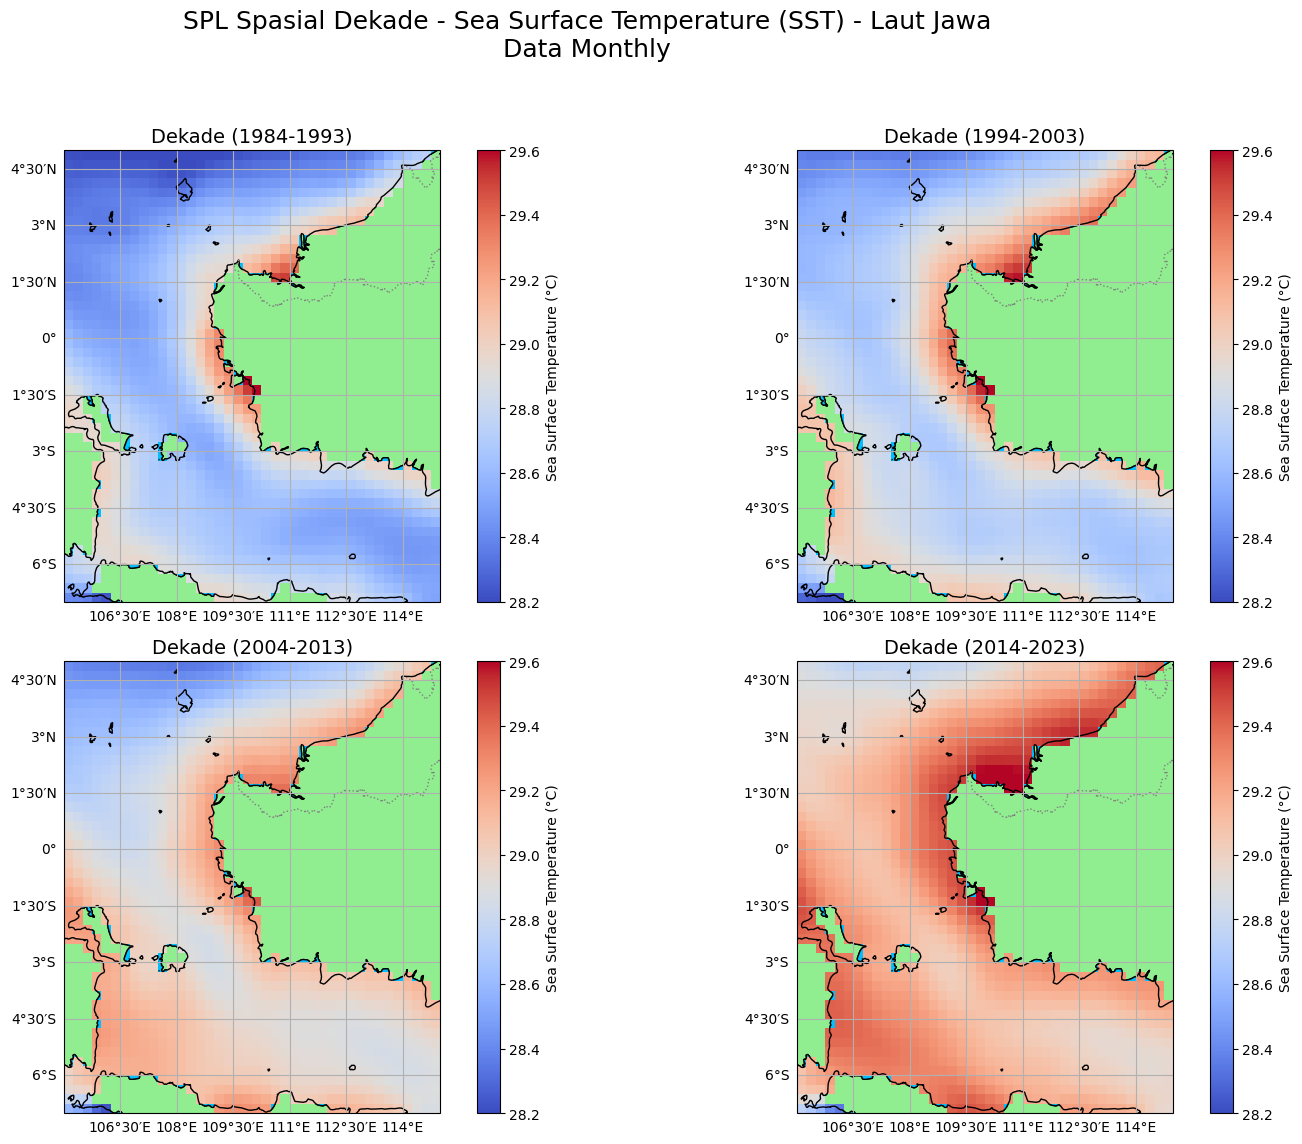

In [99]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Misalkan variabel SST ada dalam dataset dengan nama 'sst'
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0  # Batas latitude Laut Jawa
lon_min, lon_max = 105.0, 115.0  # Batas longitude Laut Jawa

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang akan diubah menjadi NaN untuk mencegah outlier
years_to_nan = [1985, 1988, 2013]
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Rentang colorbar tetap
vmin, vmax = 28.2, 29.6

# Membagi data menjadi 4 dekade sesuai rentang yang diminta
decades = [
    (1984, 1993),
    (1994, 2003),
    (2004, 2013),
    (2014, 2023)
]

# Membuat plot untuk setiap dekade dalam satu gambar
fig, axes = plt.subplots(2, 2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('SPL Spasial Dekade - Sea Surface Temperature (SST) - Laut Jawa\nData Monthly', fontsize=18)

for i, (start, end) in enumerate(decades):
    # Filter data untuk dekade tertentu
    decade_data = sst_jawa.sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    
    # Mengambil rata-rata SST sepanjang dekade ini
    sst_decade_mean = decade_data.mean(dim='time')
    
    # Menentukan subplot berdasarkan indeks
    ax = axes[i // 2, i % 2]
    
    # Set extent dan fitur peta
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='lightgreen', edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='gray')
    ax.add_feature(cfeature.OCEAN, facecolor='deepskyblue')
    
    # Plot data SST dengan rentang colorbar yang sama
    mesh = ax.pcolormesh(sst_decade_mean['lon'], sst_decade_mean['lat'], sst_decade_mean,
                         cmap='coolwarm', vmin=vmin, vmax=vmax,
                         transform=ccrs.PlateCarree(), shading='auto')
    
    # Menambahkan colorbar vertikal untuk tiap plot
    cbar = fig.colorbar(mesh, ax=ax, orientation='vertical', pad=0.05)
    cbar.set_label('Sea Surface Temperature (°C)', fontsize=10)
    
    # Menambahkan judul untuk tiap subplot
    ax.set_title(f'Dekade ({start}-{end})', fontsize=14)
    
    # Menambahkan gridlines untuk Latitude dan Longitude
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
    gl.top_labels = False
    gl.right_labels = False

# Mengatur layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


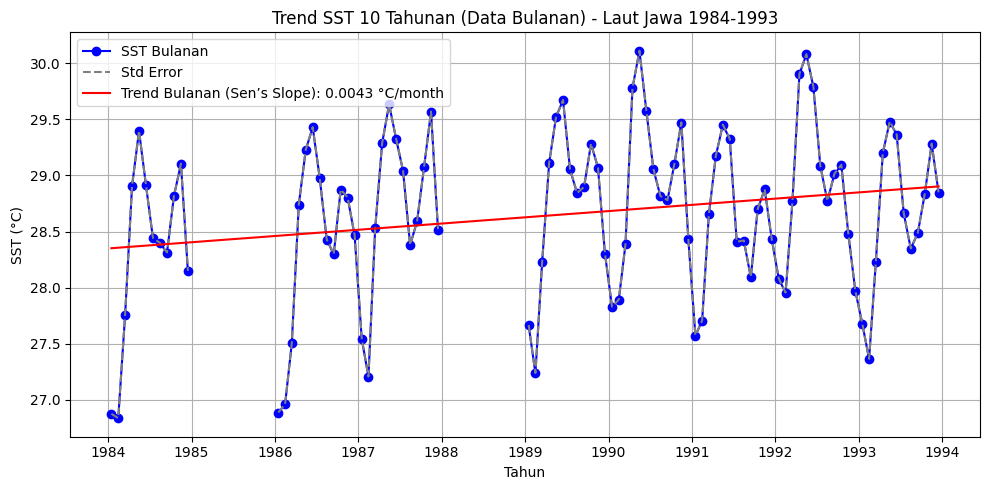

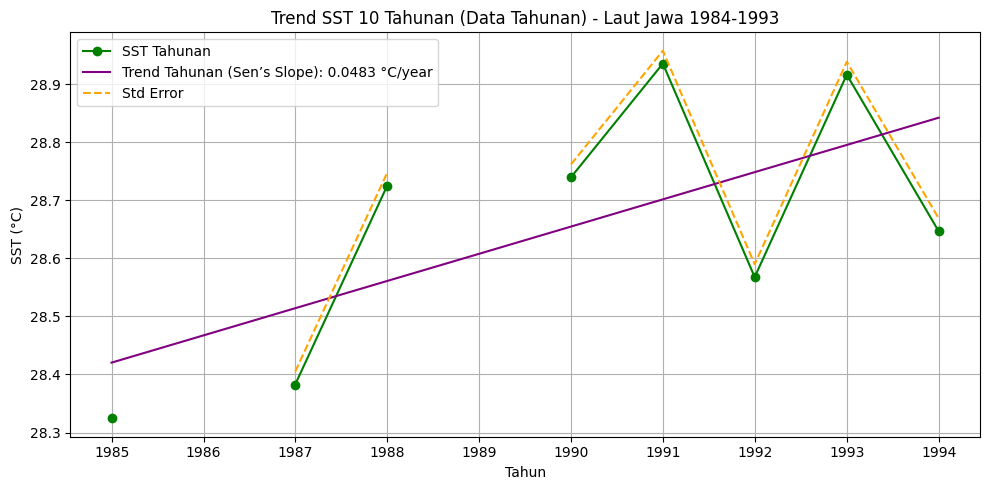

c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


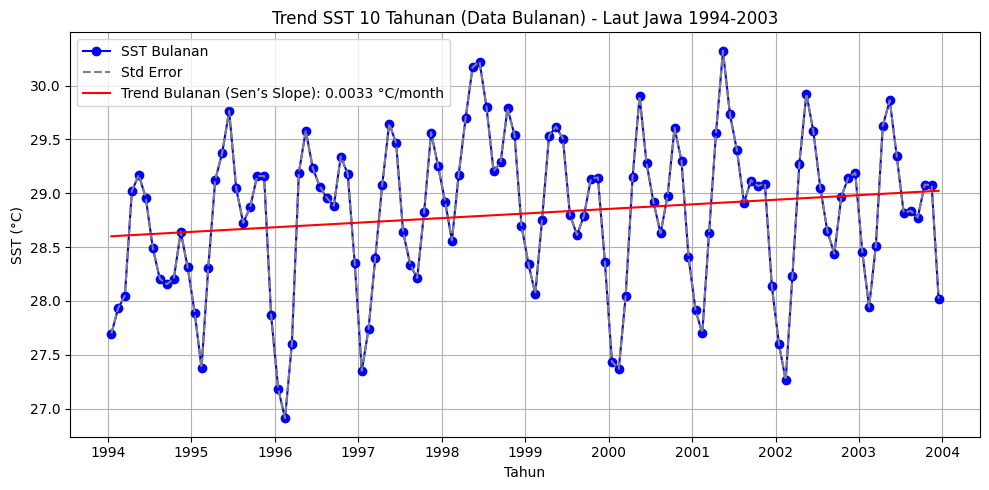

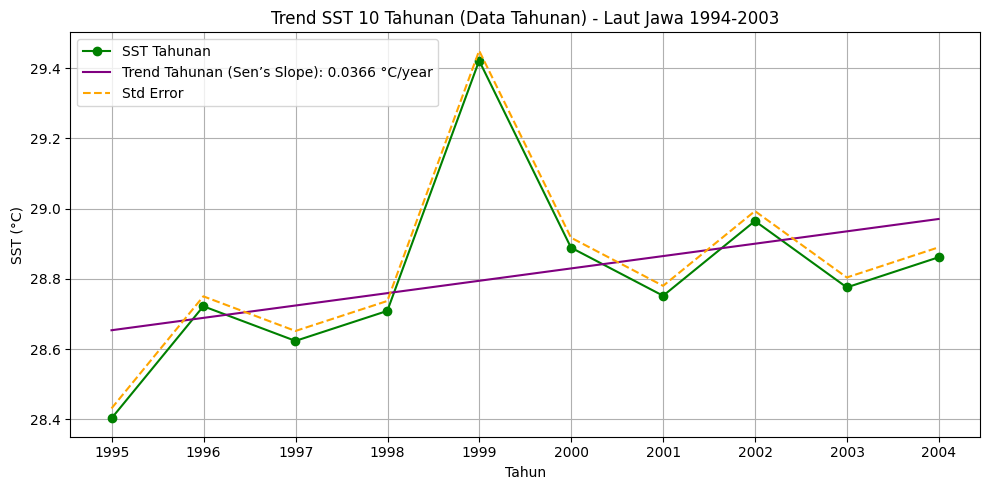

c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


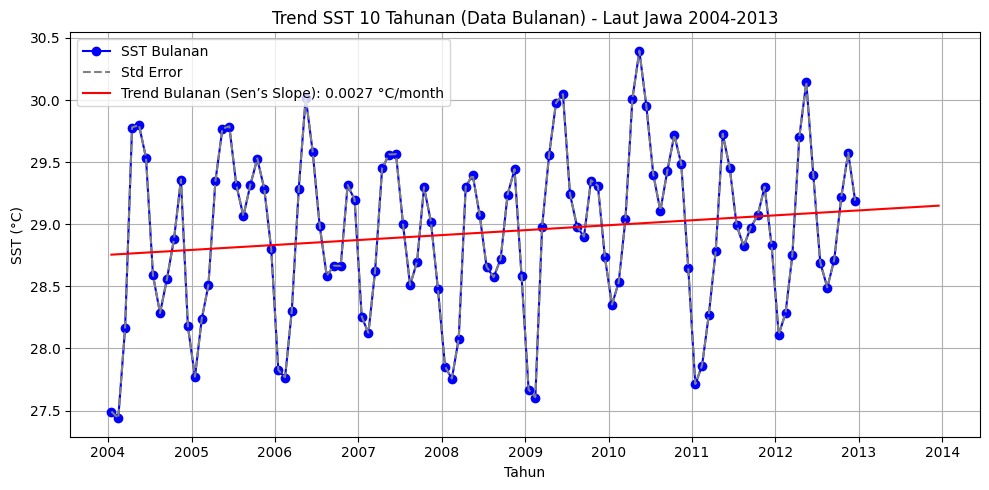

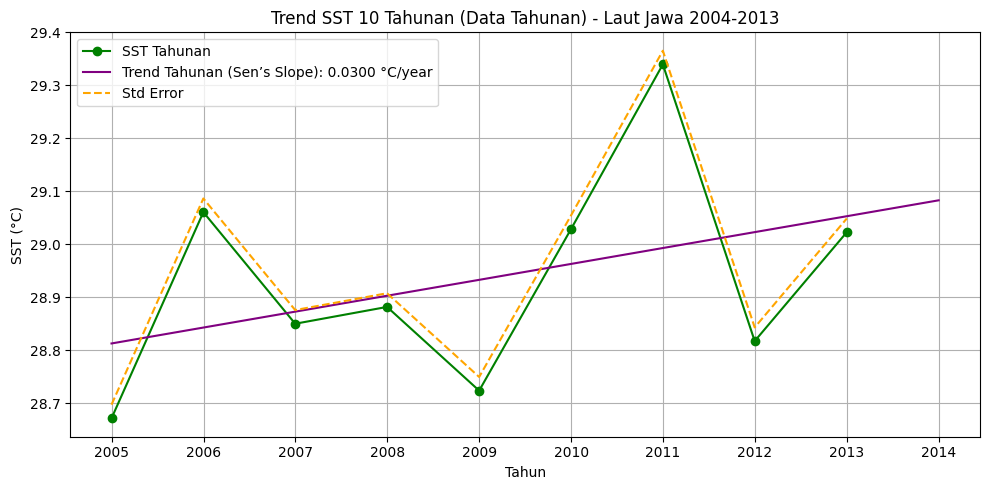

c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


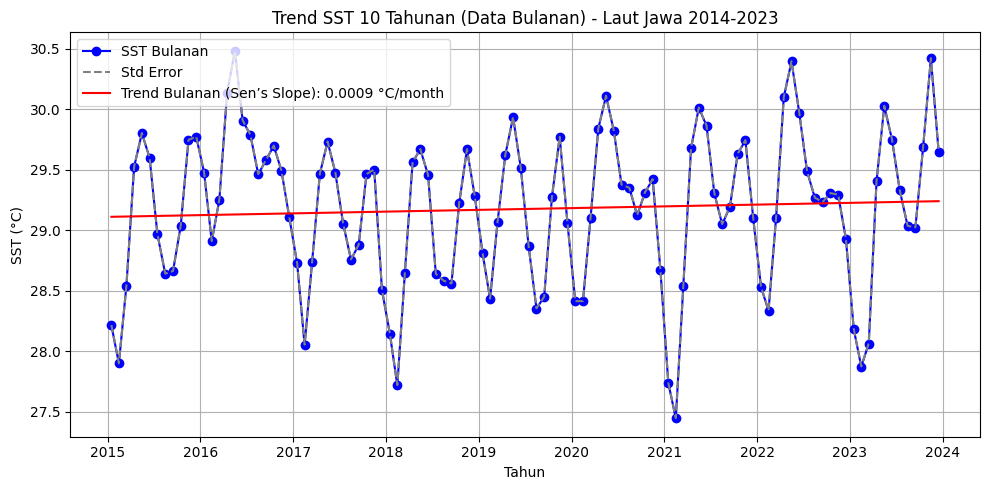

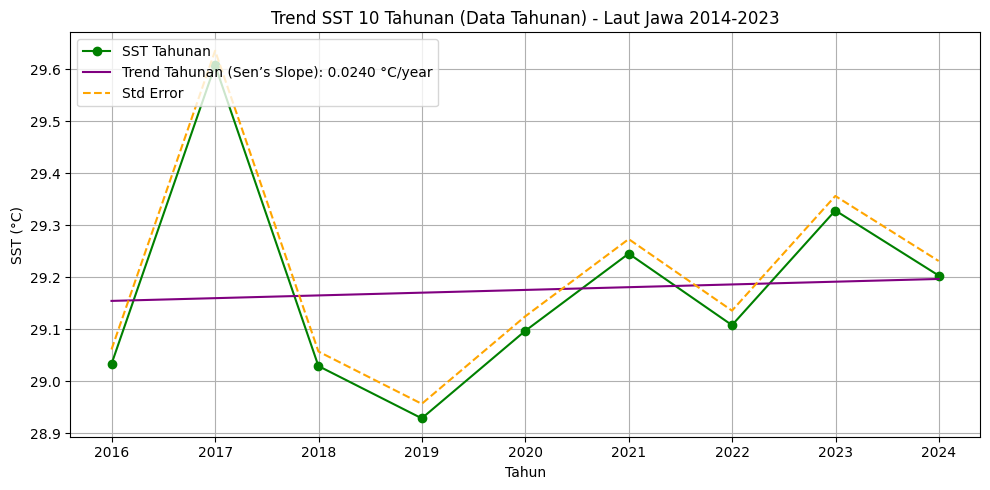

In [105]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Variabel SST diambil dari dataset
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0
lon_min, lon_max = 105.0, 115.0

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang memiliki data kosong
years_to_nan = [1985, 1988, 2013]
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Menghitung rata-rata spasial (lat dan lon)
sst_jawa_mean = sst_jawa.mean(dim=['lat', 'lon'])

# Membagi data menjadi dekade sesuai rentang yang diminta
decades = [
    (1984, 1993),
    (1994, 2003),
    (2004, 2013),
    (2014, 2023)
]

# Fungsi untuk menghitung Sen's Slope Estimation
def sens_slope(data):
    n = len(data)
    slopes = [(data[j] - data[i]) / (j - i) for i in range(n) for j in range(i + 1, n)]
    slope = np.median(slopes)
    return slope

# Fungsi untuk menghitung trend dan standard error dengan regresi linier
def calculate_trend_with_error(time, data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(time, data)
    return slope, intercept, std_err

# Membuat grafik untuk setiap dekade (data bulanan dan tahunan)
for start, end in decades:
    # Filter data untuk dekade tertentu
    decade_data = sst_jawa_mean.sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    
    # Data bulanan
    time_months = np.arange(len(decade_data['time']))
    monthly_slope, monthly_intercept, monthly_std_err = calculate_trend_with_error(
        time_months[~np.isnan(decade_data.values)], 
        decade_data.values[~np.isnan(decade_data.values)]
    )
    monthly_sens_slope = sens_slope(decade_data.values[~np.isnan(decade_data.values)])
    
    # Data tahunan: rata-rata per tahun
    decade_yearly_data = decade_data.resample(time="Y").mean()
    time_years = np.arange(len(decade_yearly_data['time']))
    yearly_slope, yearly_intercept, yearly_std_err = calculate_trend_with_error(
        time_years[~np.isnan(decade_yearly_data.values)], 
        decade_yearly_data.values[~np.isnan(decade_yearly_data.values)]
    )
    yearly_sens_slope = sens_slope(decade_yearly_data.values[~np.isnan(decade_yearly_data.values)])
    
    # Plot Bulanan
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot Data SST Bulanan
    ax.plot(decade_data['time'], decade_data, label='SST Bulanan', color='blue', linestyle='-', marker='o')
    
    # Plot Standard Error Bulanan
    ax.plot(decade_data['time'], decade_data + monthly_std_err, color='gray', linestyle='--', label='Std Error')
    
    # Plot Garis Trend Bulanan
    ax.plot(decade_data['time'], monthly_slope * time_months + monthly_intercept, color='red',
            label=f'Trend Bulanan (Sen’s Slope): {monthly_sens_slope:.4f} °C/month')
    
    ax.set_title(f'Trend SST 10 Tahunan (Data Bulanan) - Laut Jawa {start}-{end}')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('SST (°C)')
    ax.legend(loc='upper left')
    ax.grid()
    plt.tight_layout()
    plt.show()
    
    # Plot Tahunan
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot Data SST Tahunan
    ax.plot(decade_yearly_data['time'], decade_yearly_data, label='SST Tahunan', color='green', linestyle='-', marker='o')
    
    # Plot Garis Trend Tahunan
    ax.plot(decade_yearly_data['time'], yearly_slope * time_years + yearly_intercept, color='purple',
            label=f'Trend Tahunan (Sen’s Slope): {yearly_sens_slope:.4f} °C/year')
    
    # Plot Standard Error Tahunan
    ax.plot(decade_yearly_data['time'], decade_yearly_data + yearly_std_err, color='orange', linestyle='--', label='Std Error')
    
    ax.set_title(f'Trend SST 10 Tahunan (Data Tahunan) - Laut Jawa {start}-{end}')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('SST (°C)')
    ax.legend(loc='upper left')
    ax.grid()
    plt.tight_layout()
    plt.show()


c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(
c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


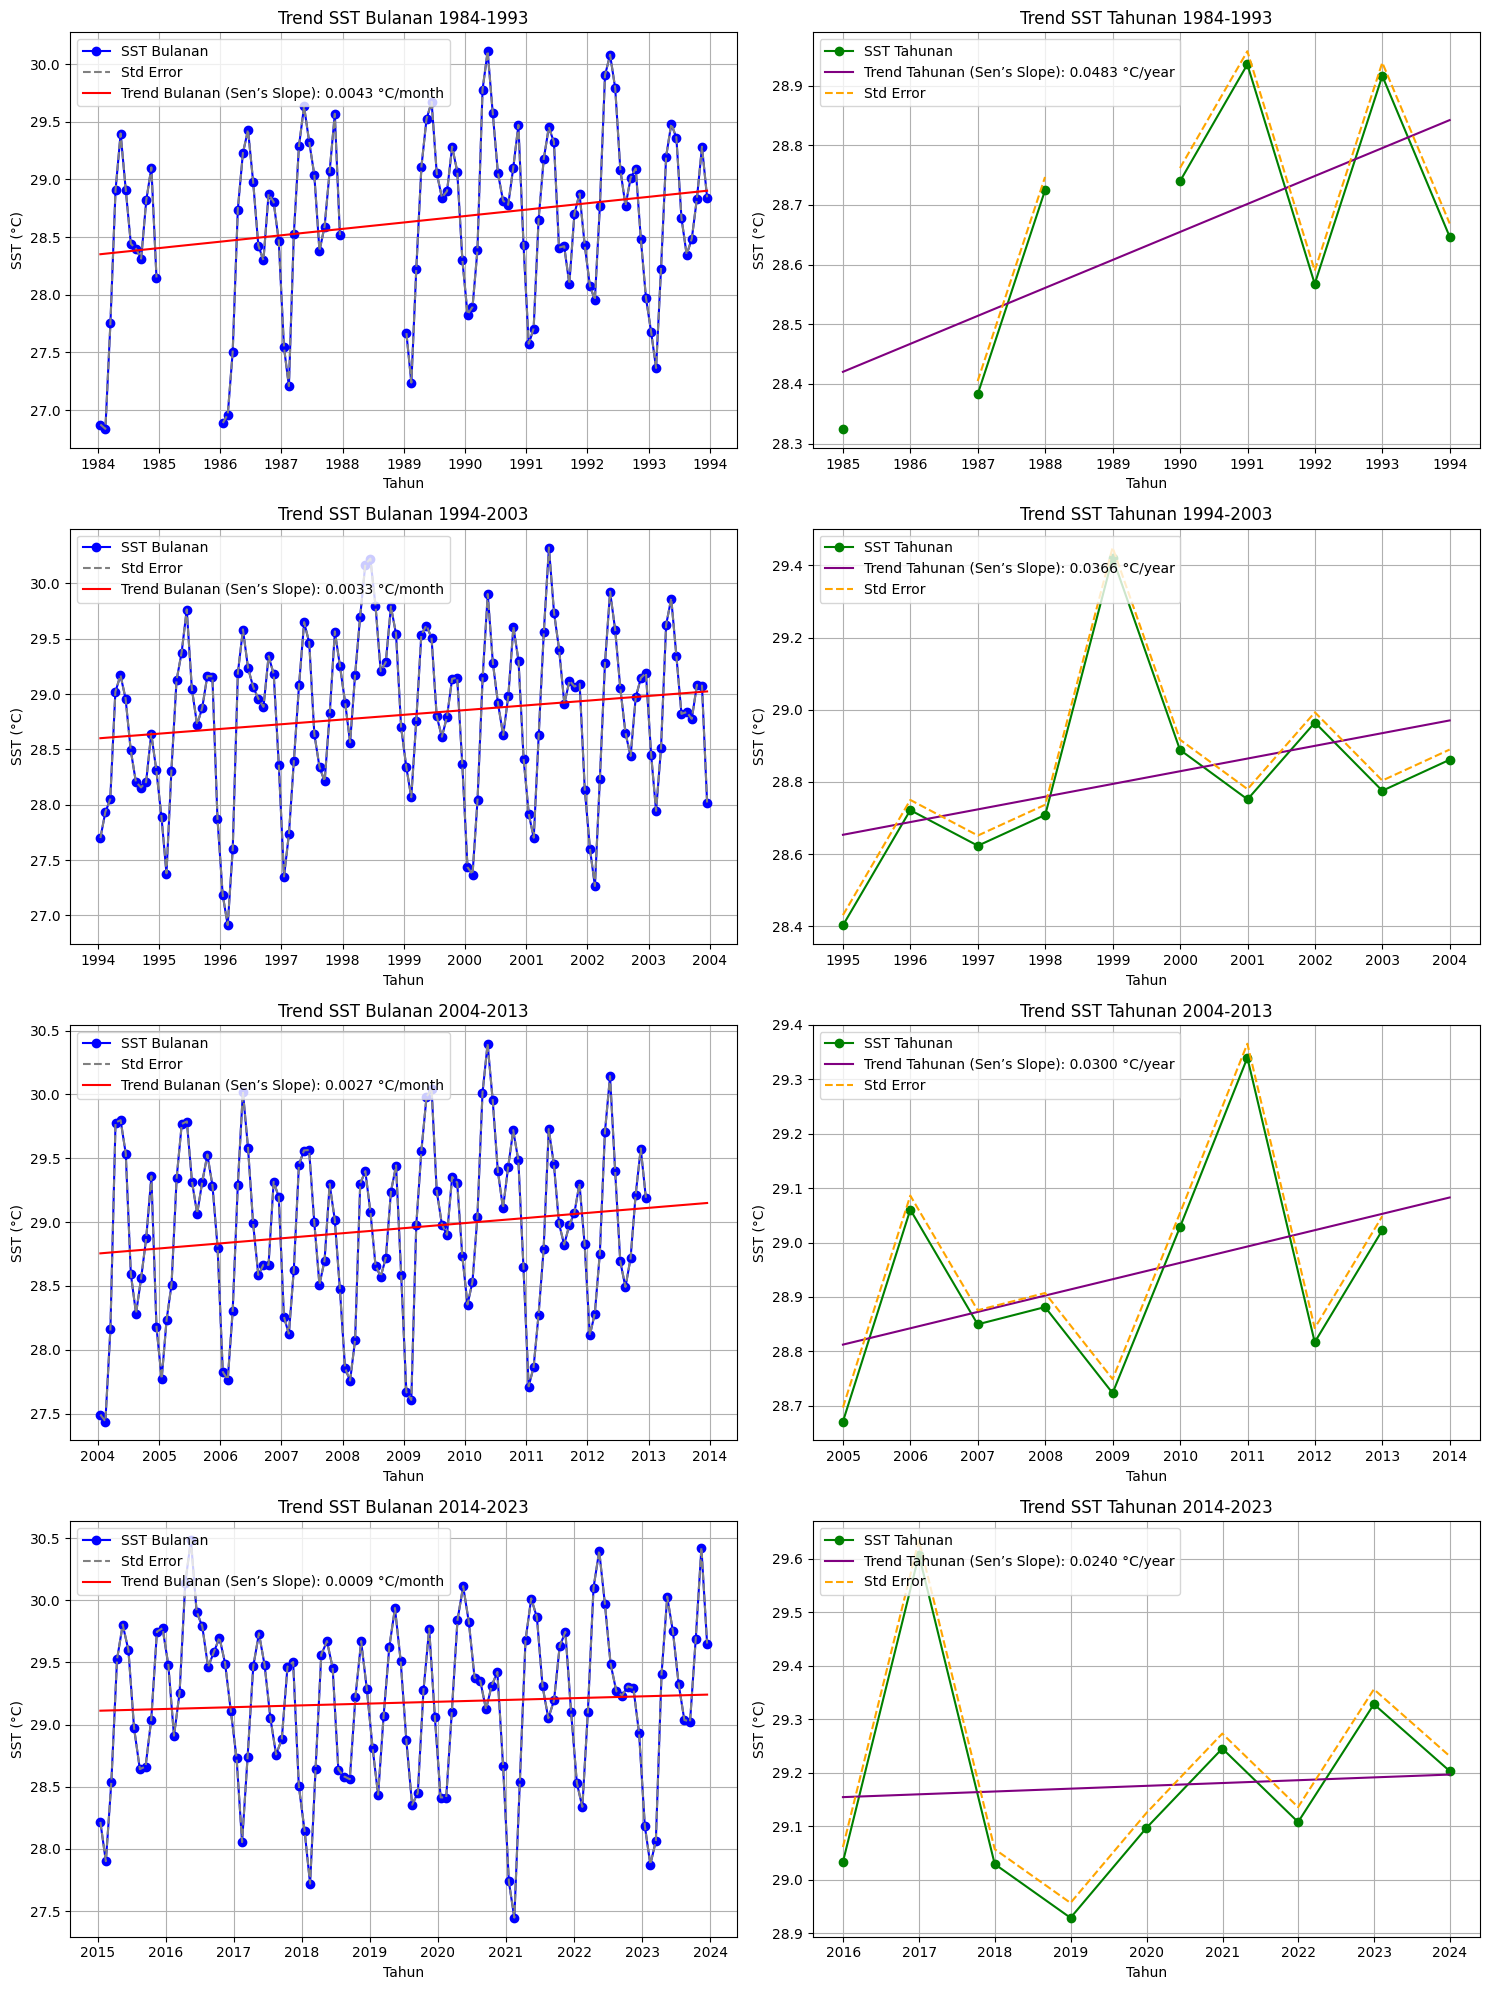

In [106]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Variabel SST diambil dari dataset
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0
lon_min, lon_max = 105.0, 115.0

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang memiliki data kosong
years_to_nan = [1985, 1988, 2013]
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Menghitung rata-rata spasial (lat dan lon)
sst_jawa_mean = sst_jawa.mean(dim=['lat', 'lon'])

# Membagi data menjadi dekade sesuai rentang yang diminta
decades = [
    (1984, 1993),
    (1994, 2003),
    (2004, 2013),
    (2014, 2023)
]

# Fungsi untuk menghitung Sen's Slope Estimation
def sens_slope(data):
    n = len(data)
    slopes = [(data[j] - data[i]) / (j - i) for i in range(n) for j in range(i + 1, n)]
    slope = np.median(slopes)
    return slope

# Fungsi untuk menghitung trend dan standard error dengan regresi linier
def calculate_trend_with_error(time, data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(time, data)
    return slope, intercept, std_err

# Membuat subplot untuk semua dekade dalam satu gambar
fig, axs = plt.subplots(nrows=len(decades), ncols=2, figsize=(15, 5 * len(decades)))

# Menambahkan plot untuk setiap dekade
for i, (start, end) in enumerate(decades):
    # Filter data untuk dekade tertentu
    decade_data = sst_jawa_mean.sel(time=slice(f'{start}-01-01', f'{end}-12-31'))
    
    # Data bulanan
    time_months = np.arange(len(decade_data['time']))
    monthly_slope, monthly_intercept, monthly_std_err = calculate_trend_with_error(
        time_months[~np.isnan(decade_data.values)], 
        decade_data.values[~np.isnan(decade_data.values)]
    )
    monthly_sens_slope = sens_slope(decade_data.values[~np.isnan(decade_data.values)])
    
    # Data tahunan: rata-rata per tahun
    decade_yearly_data = decade_data.resample(time="Y").mean()
    time_years = np.arange(len(decade_yearly_data['time']))
    yearly_slope, yearly_intercept, yearly_std_err = calculate_trend_with_error(
        time_years[~np.isnan(decade_yearly_data.values)], 
        decade_yearly_data.values[~np.isnan(decade_yearly_data.values)]
    )
    yearly_sens_slope = sens_slope(decade_yearly_data.values[~np.isnan(decade_yearly_data.values)])
    
    # Plot Bulanan
    ax = axs[i, 0]
    ax.plot(decade_data['time'], decade_data, label='SST Bulanan', color='blue', linestyle='-', marker='o')
    ax.plot(decade_data['time'], decade_data + monthly_std_err, color='gray', linestyle='--', label='Std Error')
    ax.plot(decade_data['time'], monthly_slope * time_months + monthly_intercept, color='red',
            label=f'Trend Bulanan (Sen’s Slope): {monthly_sens_slope:.4f} °C/month')
    ax.set_title(f'Trend SST Bulanan {start}-{end}')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('SST (°C)')
    ax.legend(loc='upper left')
    ax.grid()
    
    # Plot Tahunan
    ax = axs[i, 1]
    ax.plot(decade_yearly_data['time'], decade_yearly_data, label='SST Tahunan', color='green', linestyle='-', marker='o')
    ax.plot(decade_yearly_data['time'], yearly_slope * time_years + yearly_intercept, color='purple',
            label=f'Trend Tahunan (Sen’s Slope): {yearly_sens_slope:.4f} °C/year')
    ax.plot(decade_yearly_data['time'], decade_yearly_data + yearly_std_err, color='orange', linestyle='--', label='Std Error')
    ax.set_title(f'Trend SST Tahunan {start}-{end}')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('SST (°C)')
    ax.legend(loc='upper left')
    ax.grid()

# Menyesuaikan layout agar tidak ada yang terpotong
plt.tight_layout()
plt.show()


C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\1224479718.py:35: RuntimeWarning: Mean of empty slice
  avg_sst_1984_1993 = np.nanmean(sst_1984_1993, axis=0)
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\1224479718.py:43: RuntimeWarning: Mean of empty slice
  avg_sst_2004_2013 = np.nanmean(sst_2004_2013, axis=0)
C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\1224479718.py:47: RuntimeWarning: Mean of empty slice
  avg_sst_2014_2023 = np.nanmean(sst_2014_2023, axis=0)


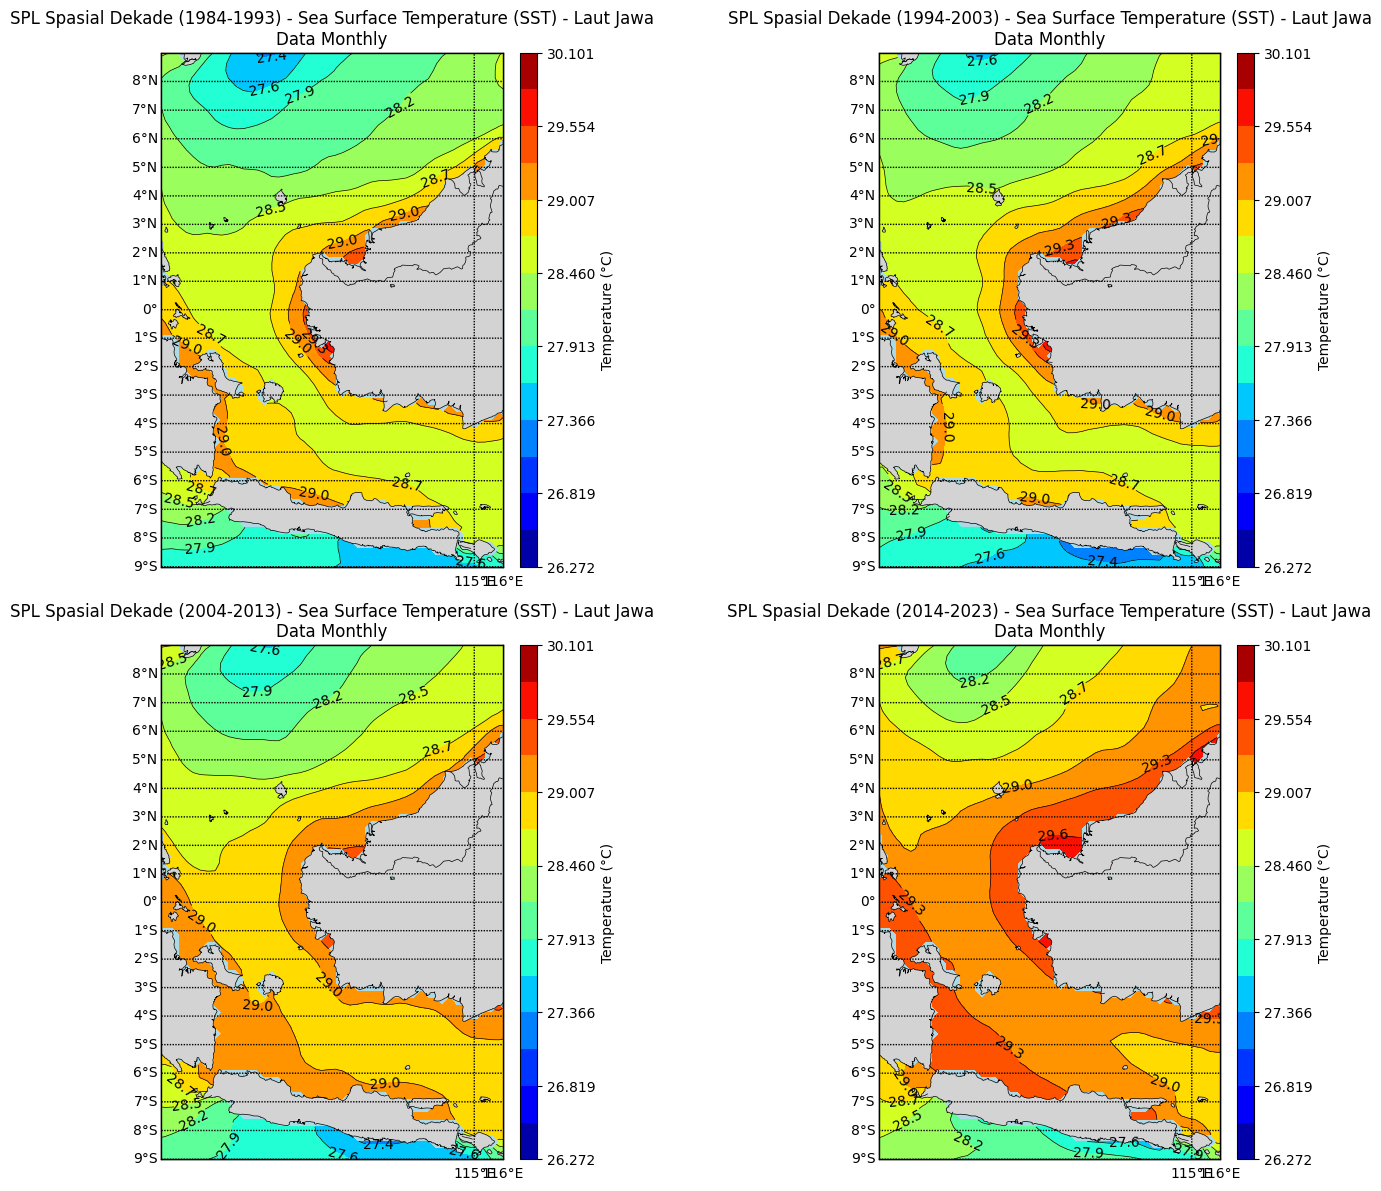

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

# Koordinat Laut Jawa (batas latitudinal: 5°S hingga 8°N dan longitud: 105°E hingga 115°E)
Koordinat = np.array([[-8.0, 105.0], [-8.0, 115.0], [8.0, 115.0], [8.0, 105.0]])

# Baca data suhu dari file netCDF
nc_data = Dataset('Indonesia_sst_mon.nc')
lons = nc_data.variables['lon'][:]
lats = nc_data.variables['lat'][:]
sst = nc_data.variables['sst'][:]  # Semua data suhu untuk seluruh rentang waktu

# Menentukan waktu (asumsi time dimulai dari 1984)
time = nc_data.variables['time'][:]
start_year = 1984
years = np.array([start_year + i for i in range(len(time) // 12)])  # Asumsi data bulanan

# Ganti nilai SST di luar rentang 0-40°C dengan NaN
sst[(sst < 0) | (sst > 40)] = np.nan

# Ganti data untuk tahun 1985, 1988, dan 2013 menjadi NaN
excluded_years = [1985, 1988, 2013]
for year in excluded_years:
    year_index = np.where(years == year)[0][0]
    month_range = slice(year_index * 12, (year_index + 1) * 12)
    sst[month_range, :, :] = np.nan

# Membuat figure untuk peta
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot SST untuk 10 tahun pertama (1984-1993)
sst_1984_1993 = sst[0:120, :, :]
avg_sst_1984_1993 = np.nanmean(sst_1984_1993, axis=0)

# Plot SST untuk 10 tahun kedua (1994-2003)
sst_1994_2003 = sst[120:240, :, :]
avg_sst_1994_2003 = np.nanmean(sst_1994_2003, axis=0)

# Plot SST untuk 10 tahun ketiga (2004-2013)
sst_2004_2013 = sst[240:360, :, :]
avg_sst_2004_2013 = np.nanmean(sst_2004_2013, axis=0)

# Plot SST untuk 10 tahun keempat (2014-2023)
sst_2014_2023 = sst[360:480, :, :]
avg_sst_2014_2023 = np.nanmean(sst_2014_2023, axis=0)

# Menentukan batas rentang suhu global untuk semua peta
sst_min = np.nanmin([avg_sst_1984_1993, avg_sst_1994_2003, avg_sst_2004_2013, avg_sst_2014_2023])
sst_max = np.nanmax([avg_sst_1984_1993, avg_sst_1994_2003, avg_sst_2004_2013, avg_sst_2014_2023])
levels = np.linspace(sst_min, sst_max, 15)  # Batas temperatur yang sama untuk semua plot

# Set up Basemap untuk plotting
def plot_sst_map(ax, sst_data, start_year, end_year):
    lon, lat = np.meshgrid(lons, lats)
    m = Basemap(projection='merc', llcrnrlon=Koordinat[:, 1].min() - 1, urcrnrlon=Koordinat[:, 1].max() + 1,
                llcrnrlat=Koordinat[:, 0].min() - 1, urcrnrlat=Koordinat[:, 0].max() + 1, resolution='i', ax=ax)
    x, y = m(lon, lat)

    # Kontur SST
    cs = m.contourf(x, y, sst_data, levels=levels, cmap='jet')
    
    # Tambahkan garis kontur dengan level
    contour = m.contour(x, y, sst_data, levels=levels, colors='k', linewidths=0.5)
    ax.clabel(contour, inline=True, fontsize=10, fmt='%1.1f')

    # Menambahkan legenda untuk skala temperatur
    cbar = m.colorbar(cs, location='right', pad="5%")
    cbar.set_label('Temperature (°C)', rotation=90)

    # Gambar grid untuk lintang dan bujur
    m.drawparallels(np.arange(-10., 10., 1.), labels=[1,0,0,0], fontsize=10)  # Lintang
    m.drawmeridians(np.arange(115., 125., 1.), labels=[0,0,0,1], fontsize=10)  # Bujur

    # Elemen peta lainnya
    m.drawcoastlines(linewidth=0.5, color='k')
    m.drawcountries(linewidth=0.5, color='k')
    m.fillcontinents(color='lightgray', lake_color='lightblue')
    m.drawmapboundary(fill_color='lightblue')
    ax.set_title(f'SPL Spasial Dekade ({start_year}-{end_year}) - Sea Surface Temperature (SST) - Laut Jawa\nData Monthly')

# Plot each 10-year period on a separate map
for i, (avg_sst, start_year, end_year) in enumerate(zip(
        [avg_sst_1984_1993, avg_sst_1994_2003, avg_sst_2004_2013, avg_sst_2014_2023],
        [1984, 1994, 2004, 2014],
        [1993, 2003, 2013, 2023])):

    ax = axes[i // 2, i % 2]
    plot_sst_map(ax, avg_sst, start_year, end_year)

# Menampilkan plot peta
plt.tight_layout()
plt.show()


C:\Users\Syafrizal Hidayat\AppData\Local\Temp\ipykernel_19548\3083613640.py:32: RuntimeWarning: Mean of empty slice
  avg_sst_1984_2023 = np.nanmean(sst_1984_2023, axis=0)


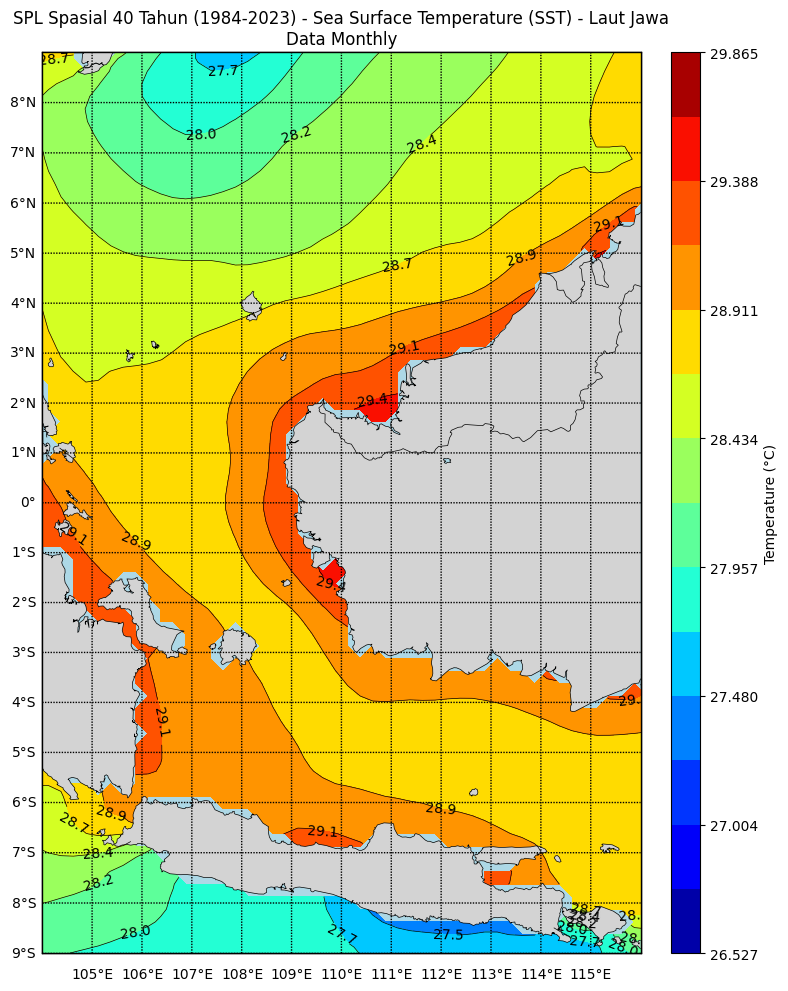

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

# Koordinat Laut Jawa (batas latitudinal: 5°S hingga 8°N dan longitud: 105°E hingga 115°E)
Koordinat = np.array([[-8.0, 105.0], [-8.0, 115.0], [8.0, 115.0], [8.0, 105.0]])

# Baca data suhu dari file netCDF
nc_data = Dataset('Indonesia_sst_mon.nc')
lons = nc_data.variables['lon'][:]
lats = nc_data.variables['lat'][:]
sst = nc_data.variables['sst'][:]  # Semua data suhu untuk seluruh rentang waktu

# Menentukan waktu (asumsi time dimulai dari 1984)
time = nc_data.variables['time'][:]
start_year = 1984
years = np.array([start_year + i for i in range(len(time) // 12)])  # Asumsi data bulanan

# Ganti nilai SST di luar rentang 0-40°C dengan NaN
sst[(sst < 0) | (sst > 40)] = np.nan

# Ganti data untuk tahun 1985, 1988, dan 2013 menjadi NaN
excluded_years = [1985, 1988, 2013]
for year in excluded_years:
    year_index = np.where(years == year)[0][0]
    month_range = slice(year_index * 12, (year_index + 1) * 12)
    sst[month_range, :, :] = np.nan

# Menghitung rata-rata SST untuk 40 tahun pertama (1984-2023)
sst_1984_2023 = sst[0:480, :, :]  # Data bulanan dari 1984 hingga 2023
avg_sst_1984_2023 = np.nanmean(sst_1984_2023, axis=0)

# Menentukan batas rentang suhu global untuk peta
sst_min = np.nanmin([avg_sst_1984_2023])
sst_max = np.nanmax([avg_sst_1984_2023])
levels = np.linspace(sst_min, sst_max, 15)  # Batas temperatur yang sama untuk semua plot

# Membuat figure untuk peta
fig, ax = plt.subplots(figsize=(18, 10))  # Membuat plot lebih lebar dan lebih panjang

# Set up Basemap untuk plotting
def plot_sst_map(ax, sst_data, start_year, end_year):
    lon, lat = np.meshgrid(lons, lats)
    m = Basemap(projection='merc', llcrnrlon=Koordinat[:, 1].min() - 1, urcrnrlon=Koordinat[:, 1].max() + 1,
                llcrnrlat=Koordinat[:, 0].min() - 1, urcrnrlat=Koordinat[:, 0].max() + 1, resolution='i', ax=ax)
    x, y = m(lon, lat)

    # Kontur SST
    cs = m.contourf(x, y, sst_data, levels=levels, cmap='jet')
    
    # Tambahkan garis kontur dengan level
    contour = m.contour(x, y, sst_data, levels=levels, colors='k', linewidths=0.5)
    ax.clabel(contour, inline=True, fontsize=10, fmt='%1.1f')

    # Menambahkan legenda untuk skala temperatur
    cbar = m.colorbar(cs, location='right', pad="5%")
    cbar.set_label('Temperature (°C)', rotation=90)

    # Gambar grid untuk lintang dan bujur
    m.drawparallels(np.arange(-10., 10., 1), labels=[1,0,0,0], fontsize=10)  # Lintang dengan interval 1 derajat
    m.drawmeridians(np.arange(105., 116., 1), labels=[0,0,0,1], fontsize=10)  # Bujur dengan interval 1 derajat

    # Elemen peta lainnya
    m.drawcoastlines(linewidth=0.5, color='k')
    m.drawcountries(linewidth=0.5, color='k')
    m.fillcontinents(color='lightgray', lake_color='lightblue')
    m.drawmapboundary(fill_color='lightblue')
    ax.set_title(f'SPL Spasial 40 Tahun ({start_year}-{end_year}) - Sea Surface Temperature (SST) - Laut Jawa\nData Monthly')

# Plot SST untuk 40 tahun (1984-2023) dalam satu gambar besar
plot_sst_map(ax, avg_sst_1984_2023, 1984, 2023)

# Menampilkan plot peta
plt.tight_layout()
plt.show()


c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


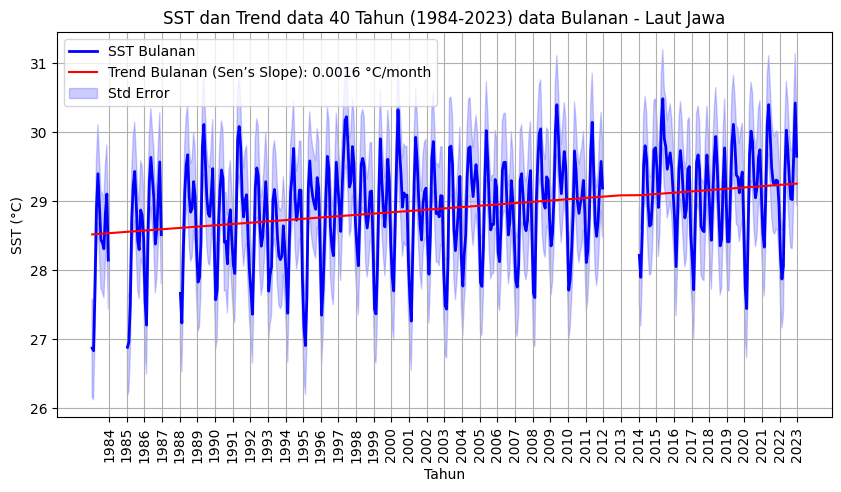

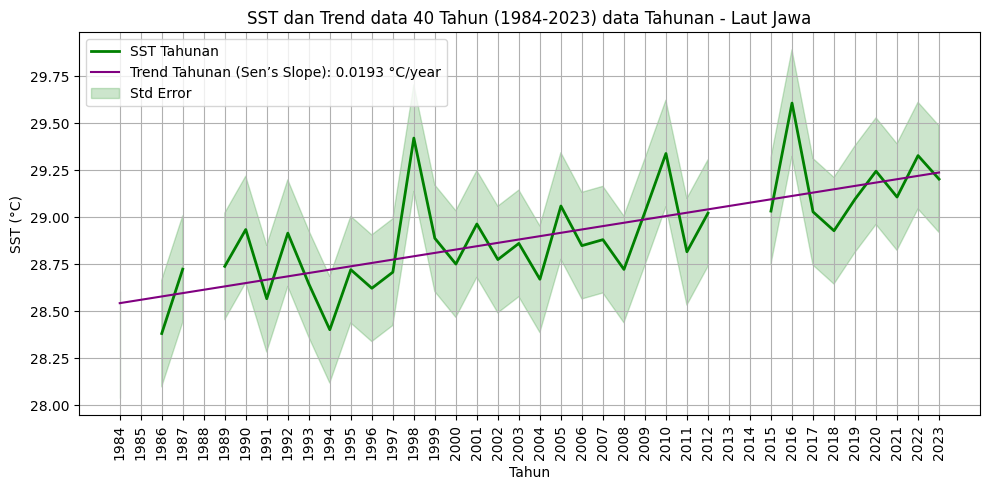

In [71]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Variabel SST diambil dari dataset
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0
lon_min, lon_max = 105.0, 115.0

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang memiliki data kosong
years_to_nan = [1985, 1988, 2013]
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Menghitung rata-rata spasial (lat dan lon)
sst_jawa_mean = sst_jawa.mean(dim=['lat', 'lon'])

# Membatasi data untuk periode 1984-2023
sst_jawa_mean = sst_jawa_mean.sel(time=slice('1984-01-01', '2023-12-31'))

# Fungsi untuk menghitung Sen's Slope Estimation
def sens_slope(data):
    n = len(data)
    slopes = [(data[j] - data[i]) / (j - i) for i in range(n) for j in range(i + 1, n)]
    slope = np.median(slopes)
    return slope

# Fungsi untuk menghitung trend dan standard error dengan regresi linier
def calculate_trend_with_error(time, data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(time, data)
    return slope, intercept, std_err

# **Grafik Bulanan**

time_months = np.arange(len(sst_jawa_mean['time']))
monthly_slope, monthly_intercept, monthly_std_err = calculate_trend_with_error(
    time_months[~np.isnan(sst_jawa_mean.values)], 
    sst_jawa_mean.values[~np.isnan(sst_jawa_mean.values)]
)
monthly_sens_slope = sens_slope(sst_jawa_mean.values[~np.isnan(sst_jawa_mean.values)])

# Standard deviation untuk grafik bulanan
monthly_std = np.nanstd(sst_jawa_mean.values)

# Plot pertama untuk data bulanan
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Data SST Bulanan
ax1.plot(sst_jawa_mean['time'], sst_jawa_mean, label='SST Bulanan', color='blue', linestyle='-', linewidth=2)
ax1.plot(sst_jawa_mean['time'], monthly_slope * time_months + monthly_intercept, color='red',
         label=f'Trend Bulanan (Sen’s Slope): {monthly_sens_slope:.4f} °C/month')

# Plot Standard Deviation Bulanan
ax1.fill_between(sst_jawa_mean['time'], sst_jawa_mean - monthly_std, sst_jawa_mean + monthly_std, 
                 color='blue', alpha=0.2, label='Std Error')

# Menampilkan semua tahun dari 1984 sampai 2023 pada sumbu X dengan rotasi 90 derajat
ax1.set_xticks(sst_jawa_yearly['time'])
ax1.set_xticklabels([str(year) for year in range(1984, 2024)], rotation=90)

ax1.set_title('SST dan Trend data 40 Tahun (1984-2023) data Bulanan - Laut Jawa')
ax1.set_xlabel('Tahun')
ax1.set_ylabel('SST (°C)')
ax1.legend(loc='upper left')
ax1.grid()

# **Grafik Tahunan**

sst_jawa_yearly = sst_jawa_mean.resample(time="Y").mean()
time_years = np.arange(len(sst_jawa_yearly['time']))
yearly_slope, yearly_intercept, yearly_std_err = calculate_trend_with_error(
    time_years[~np.isnan(sst_jawa_yearly.values)], 
    sst_jawa_yearly.values[~np.isnan(sst_jawa_yearly.values)]
)
yearly_sens_slope = sens_slope(sst_jawa_yearly.values[~np.isnan(sst_jawa_yearly.values)])

# Standard deviation untuk grafik tahunan
yearly_std = np.nanstd(sst_jawa_yearly.values)

# Plot kedua untuk data tahunan
fig, ax2 = plt.subplots(figsize=(10, 5))

# Plot Data SST Tahunan
ax2.plot(sst_jawa_yearly['time'], sst_jawa_yearly, label='SST Tahunan', color='green', linestyle='-', linewidth=2)
ax2.plot(sst_jawa_yearly['time'], yearly_slope * time_years + yearly_intercept, color='purple',
         label=f'Trend Tahunan (Sen’s Slope): {yearly_sens_slope:.4f} °C/year')

# Plot Standard Deviation Tahunan
ax2.fill_between(sst_jawa_yearly['time'], sst_jawa_yearly - yearly_std, sst_jawa_yearly + yearly_std, 
                 color='green', alpha=0.2, label='Std Error')

ax2.set_title('SST dan Trend data 40 Tahun (1984-2023) data Tahunan - Laut Jawa')
ax2.set_xlabel('Tahun')
ax2.set_ylabel('SST (°C)')
ax2.legend(loc='upper left')
ax2.grid()

# Menampilkan semua tahun dari 1984 sampai 2023 pada sumbu X dengan rotasi 90 derajat
ax2.set_xticks(sst_jawa_yearly['time'])
ax2.set_xticklabels([str(year) for year in range(1984, 2024)], rotation=90)

# Menyusun dan menampilkan grafik
plt.tight_layout()
plt.show()


c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


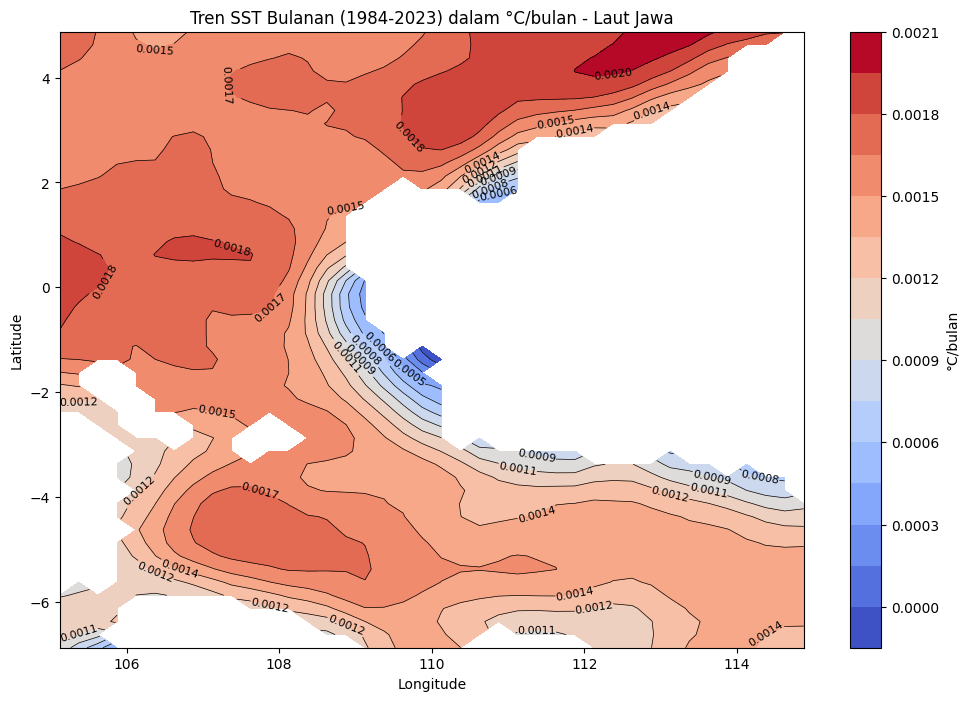

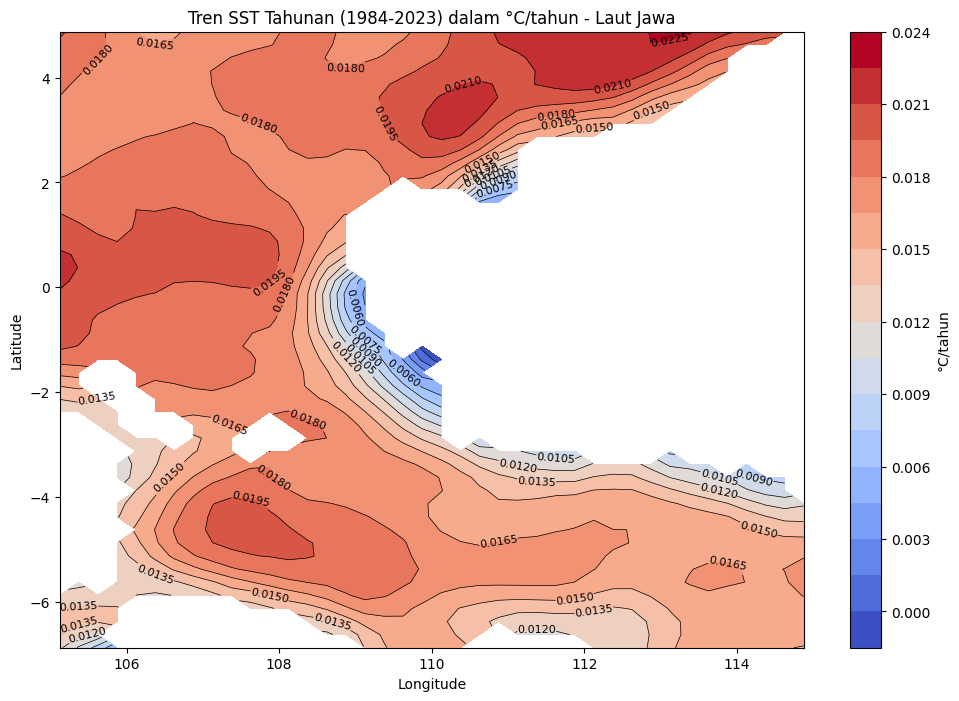

In [80]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Variabel SST diambil dari dataset
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0
lon_min, lon_max = 105.0, 115.0

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang memiliki data kosong
years_to_nan = [1985, 1988, 2013]
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Fungsi untuk menghitung tren dalam °C/bulan atau °C/tahun
def calculate_trend(data):
    time_in_months = np.arange(data.shape[0])
    valid_data = ~np.isnan(data)  # Data valid (bukan NaN)
    if np.sum(valid_data) > 1:  # Minimal 2 data valid
        trend, _ = np.polyfit(time_in_months[valid_data], data[valid_data], 1)
        return trend  # Tren dalam °C/bulan atau °C/tahun
    else:
        return np.nan

# Menghitung tren bulanan (SST Bulanan)
monthly_trend = xr.apply_ufunc(
    calculate_trend, sst_jawa,
    vectorize=True, input_core_dims=[['time']],
)

# Menghitung tren tahunan (SST Tahunan)
sst_jawa_yearly = sst_jawa.resample(time="Y").mean()
annual_trend = xr.apply_ufunc(
    calculate_trend, sst_jawa_yearly,
    vectorize=True, input_core_dims=[['time']],
)

# Tentukan batas skala otomatis berdasarkan nilai tren
vmin_monthly, vmax_monthly = np.nanmin(monthly_trend), np.nanmax(monthly_trend)
vmin_annual, vmax_annual = np.nanmin(annual_trend), np.nanmax(annual_trend)

# Plot untuk Tren Bulanan dengan Kontur
fig, ax = plt.subplots(figsize=(12, 8))
contour_monthly = ax.contourf(
    sst_jawa['lon'], sst_jawa['lat'], monthly_trend,
    levels=15, cmap='coolwarm', vmin=vmin_monthly, vmax=vmax_monthly
)
ax.set_title('Tren SST Bulanan (1984-2023) dalam °C/bulan - Laut Jawa')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan garis kontur dan label tren
contour_lines_monthly = ax.contour(
    sst_jawa['lon'], sst_jawa['lat'], monthly_trend,
    levels=15, colors='black', linewidths=0.5
)
ax.clabel(contour_lines_monthly, inline=True, fmt="%.4f", fontsize=8)
fig.colorbar(contour_monthly, ax=ax, label='°C/bulan')

plt.show()

# Plot untuk Tren Tahunan dengan Kontur
fig, ax2 = plt.subplots(figsize=(12, 8))
contour_annual = ax2.contourf(
    sst_jawa_yearly['lon'], sst_jawa_yearly['lat'], annual_trend,
    levels=15, cmap='coolwarm', vmin=vmin_annual, vmax=vmax_annual
)
ax2.set_title('Tren SST Tahunan (1984-2023) dalam °C/tahun - Laut Jawa')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Menambahkan garis kontur dan label tren
contour_lines_annual = ax2.contour(
    sst_jawa_yearly['lon'], sst_jawa_yearly['lat'], annual_trend,
    levels=15, colors='black', linewidths=0.5
)
ax2.clabel(contour_lines_annual, inline=True, fmt="%.4f", fontsize=8)
fig.colorbar(contour_annual, ax=ax2, label='°C/tahun')

plt.show()


c:\Users\Syafrizal Hidayat\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\core\groupby.py:668: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


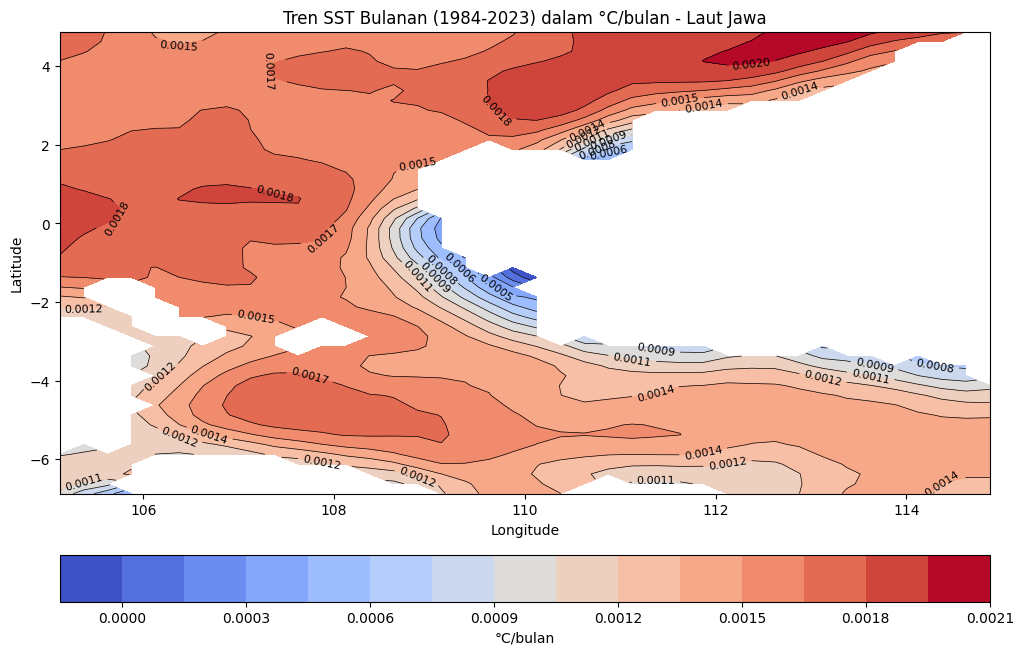

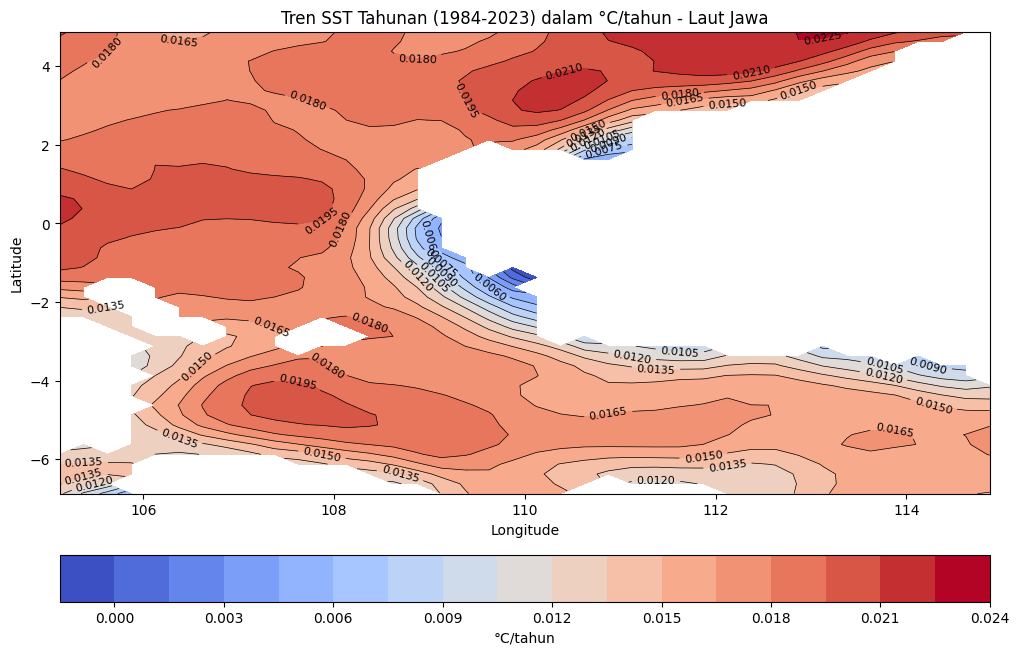

In [84]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Membaca data dari file NetCDF
file_path = 'Indonesia_sst_mon.nc'
ds = xr.open_dataset(file_path)

# Variabel SST diambil dari dataset
sst = ds['sst']

# Menentukan batas geografis Laut Jawa
lat_min, lat_max = -7.0, 5.0
lon_min, lon_max = 105.0, 115.0

# Memilih data untuk Laut Jawa
sst_jawa = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Daftar tahun yang memiliki data kosong
years_to_nan = [1985, 1988, 2013]
sst_jawa = sst_jawa.where(~sst_jawa['time.year'].isin(years_to_nan))

# Fungsi untuk menghitung tren dalam °C/bulan atau °C/tahun
def calculate_trend(data):
    time_in_months = np.arange(data.shape[0])
    valid_data = ~np.isnan(data)  # Data valid (bukan NaN)
    if np.sum(valid_data) > 1:  # Minimal 2 data valid
        trend, _ = np.polyfit(time_in_months[valid_data], data[valid_data], 1)
        return trend  # Tren dalam °C/bulan atau °C/tahun
    else:
        return np.nan

# Menghitung tren bulanan (SST Bulanan)
monthly_trend = xr.apply_ufunc(
    calculate_trend, sst_jawa,
    vectorize=True, input_core_dims=[['time']],
)

# Menghitung tren tahunan (SST Tahunan)
sst_jawa_yearly = sst_jawa.resample(time="Y").mean()
annual_trend = xr.apply_ufunc(
    calculate_trend, sst_jawa_yearly,
    vectorize=True, input_core_dims=[['time']],
)

# Tentukan batas skala otomatis berdasarkan nilai tren
vmin_monthly, vmax_monthly = np.nanmin(monthly_trend), np.nanmax(monthly_trend)
vmin_annual, vmax_annual = np.nanmin(annual_trend), np.nanmax(annual_trend)

# Plot untuk Tren Bulanan dengan Kontur dan Colorbar Horizontal
fig, ax = plt.subplots(figsize=(12, 8))
contour_monthly = ax.contourf(
    sst_jawa['lon'], sst_jawa['lat'], monthly_trend,
    levels=15, cmap='coolwarm', vmin=vmin_monthly, vmax=vmax_monthly
)
ax.set_title('Tren SST Bulanan (1984-2023) dalam °C/bulan - Laut Jawa')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Menambahkan garis kontur dan label tren
contour_lines_monthly = ax.contour(
    sst_jawa['lon'], sst_jawa['lat'], monthly_trend,
    levels=15, colors='black', linewidths=0.5
)
ax.clabel(contour_lines_monthly, inline=True, fmt="%.4f", fontsize=8)

# Menambahkan colorbar horizontal di bawah peta
cbar = fig.colorbar(contour_monthly, ax=ax, orientation='horizontal', label='°C/bulan', pad=0.1)

plt.show()

# Plot untuk Tren Tahunan dengan Kontur dan Colorbar Horizontal
fig, ax2 = plt.subplots(figsize=(12, 8))
contour_annual = ax2.contourf(
    sst_jawa_yearly['lon'], sst_jawa_yearly['lat'], annual_trend,
    levels=15, cmap='coolwarm', vmin=vmin_annual, vmax=vmax_annual
)
ax2.set_title('Tren SST Tahunan (1984-2023) dalam °C/tahun - Laut Jawa')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Menambahkan garis kontur dan label tren
contour_lines_annual = ax2.contour(
    sst_jawa_yearly['lon'], sst_jawa_yearly['lat'], annual_trend,
    levels=15, colors='black', linewidths=0.5
)
ax2.clabel(contour_lines_annual, inline=True, fmt="%.4f", fontsize=8)

# Menambahkan colorbar horizontal di bawah peta
cbar2 = fig.colorbar(contour_annual, ax=ax2, orientation='horizontal', label='°C/tahun', pad=0.1)

plt.show()
